In [1]:
from google.colab import drive 
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


###reading train and test files and clubbing both for uniform cleaning

In [2]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/IOT/train_aWnotuB.csv')
test=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
print(train.shape)
print(test.shape)

(48120, 4)
(11808, 3)


In [3]:
train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


In [4]:
test.head()

,DateTime,Junction,ID
0,2017-07-01 00:00:00,1,20170701001
1,2017-07-01 01:00:00,1,20170701011
2,2017-07-01 02:00:00,1,20170701021
3,2017-07-01 03:00:00,1,20170701031
4,2017-07-01 04:00:00,1,20170701041


In [0]:
train['train/test']=1
test['train/test']=0

In [6]:
df1=pd.concat([train,test],axis=0)
df=df1.drop(columns=['ID'],axis=1)
print(df.shape)

(59928, 4)


In [7]:
df.head()

,DateTime,Junction,Vehicles,train/test
0,2015-11-01 00:00:00,1,15.0,1
1,2015-11-01 01:00:00,1,13.0,1
2,2015-11-01 02:00:00,1,10.0,1
3,2015-11-01 03:00:00,1,7.0,1
4,2015-11-01 04:00:00,1,9.0,1


In [8]:
df.tail()

,DateTime,Junction,Vehicles,train/test
11803,2017-10-31 19:00:00,4,NaN,0
11804,2017-10-31 20:00:00,4,NaN,0
11805,2017-10-31 21:00:00,4,NaN,0
11806,2017-10-31 22:00:00,4,NaN,0
11807,2017-10-31 23:00:00,4,NaN,0


###checking missing value in the dataset

In [9]:
df.isnull().sum()*100/df.shape[0]

DateTime       0.000000
Junction       0.000000
Vehicles      19.703644
train/test     0.000000
dtype: float64

In [0]:
# there is no missing value in the dataset. the missing value in "vehicles" is because we clubbed train and test. test doesnt have any target feature.

In [11]:
df['Junction'].value_counts()

3    17544
2    17544
1    17544
4     7296
Name: Junction, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   DateTime    59928 non-null  object 
 1   Junction    59928 non-null  int64  
 2   Vehicles    48120 non-null  float64
 3   train/test  59928 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.3+ MB


#converting into datetime

In [0]:
df['DateTime']=pd.to_datetime(df['DateTime'])

#### making a copy of model.
df is final dataframe before feature engineering

In [0]:
df1=df.copy()

#Feature engineering
extracting month,day,day name,date,hour,minute etc from datetime feature.

In [0]:
datetimes = pd.to_datetime(df1['DateTime'])
df1['month'] = datetimes.dt.month
df1['year'] = datetimes.dt.year
df1['Day'] = datetimes.dt.day
df1['Day_Name'] = datetimes.dt.day_name()
df1['hour']=datetimes.dt.hour

In [16]:
df1.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour
0,2015-11-01 00:00:00,1,15.0,1,11,2015,1,Sunday,0
1,2015-11-01 01:00:00,1,13.0,1,11,2015,1,Sunday,1
2,2015-11-01 02:00:00,1,10.0,1,11,2015,1,Sunday,2
3,2015-11-01 03:00:00,1,7.0,1,11,2015,1,Sunday,3
4,2015-11-01 04:00:00,1,9.0,1,11,2015,1,Sunday,4


In [17]:
df1['month'].value_counts()

10    5208
8     5208
7     5208
5     5208
3     5208
1     5208
9     5040
6     5040
4     5040
2     4776
12    4464
11    4320
Name: month, dtype: int64

In [18]:
df1['year'].value_counts()

2017    29184
2016    26352
2015     4392
Name: year, dtype: int64

In [19]:
df1['Day'].nunique()

31

In [20]:
df1['Day_Name'].value_counts()

Tuesday      8616
Monday       8616
Sunday       8616
Saturday     8520
Thursday     8520
Wednesday    8520
Friday       8520
Name: Day_Name, dtype: int64

In [21]:
df1['hour'].nunique()

24

In [22]:
df1['hour'].value_counts()

23    2497
22    2497
1     2497
2     2497
3     2497
4     2497
5     2497
6     2497
7     2497
8     2497
9     2497
10    2497
11    2497
12    2497
13    2497
14    2497
15    2497
16    2497
17    2497
18    2497
19    2497
20    2497
21    2497
0     2497
Name: hour, dtype: int64

##feature engineering for making new feature (weekend and AM,PM)

In [0]:
def weekend(x):
  if x in ['Sunday','Saturday']:
    return('weekend')
  else:
    return("weekdays")

In [0]:
def ampm(x):
  if x in[0,1,2,3,4,5,6,7,8,9,10,11]:
    return('AM')
  else:
    return("PM")


In [0]:
df1['weekend']=df1['Day_Name'].apply(weekend)


In [0]:
df1['AM_PM']=df1['hour'].apply(ampm)

In [27]:
df1.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour,weekend,AM_PM
0,2015-11-01 00:00:00,1,15.0,1,11,2015,1,Sunday,0,weekend,AM
1,2015-11-01 01:00:00,1,13.0,1,11,2015,1,Sunday,1,weekend,AM
2,2015-11-01 02:00:00,1,10.0,1,11,2015,1,Sunday,2,weekend,AM
3,2015-11-01 03:00:00,1,7.0,1,11,2015,1,Sunday,3,weekend,AM
4,2015-11-01 04:00:00,1,9.0,1,11,2015,1,Sunday,4,weekend,AM


In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateTime    59928 non-null  datetime64[ns]
 1   Junction    59928 non-null  int64         
 2   Vehicles    48120 non-null  float64       
 3   train/test  59928 non-null  int64         
 4   month       59928 non-null  int64         
 5   year        59928 non-null  int64         
 6   Day         59928 non-null  int64         
 7   Day_Name    59928 non-null  object        
 8   hour        59928 non-null  int64         
 9   weekend     59928 non-null  object        
 10  AM_PM       59928 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(3)
memory usage: 5.5+ MB


## converting datatype of "month","year","day" into categorical

In [0]:
df1['month']=df1['month'].astype('object')
df1['year']=df1['year'].astype('object')
df1['Day']=df1['Day'].astype('object')

In [30]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateTime    59928 non-null  datetime64[ns]
 1   Junction    59928 non-null  int64         
 2   Vehicles    48120 non-null  float64       
 3   train/test  59928 non-null  int64         
 4   month       59928 non-null  object        
 5   year        59928 non-null  object        
 6   Day         59928 non-null  object        
 7   Day_Name    59928 non-null  object        
 8   hour        59928 non-null  int64         
 9   weekend     59928 non-null  object        
 10  AM_PM       59928 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 5.5+ MB


## converting categorical features into dummy variables

In [0]:
df1=pd.get_dummies(data=df1,columns=['Junction','month','year','Day','Day_Name','weekend','AM_PM'],drop_first=True)


In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 58 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            59928 non-null  datetime64[ns]
 1   Vehicles            48120 non-null  float64       
 2   train/test          59928 non-null  int64         
 3   hour                59928 non-null  int64         
 4   Junction_2          59928 non-null  uint8         
 5   Junction_3          59928 non-null  uint8         
 6   Junction_4          59928 non-null  uint8         
 7   month_2             59928 non-null  uint8         
 8   month_3             59928 non-null  uint8         
 9   month_4             59928 non-null  uint8         
 10  month_5             59928 non-null  uint8         
 11  month_6             59928 non-null  uint8         
 12  month_7             59928 non-null  uint8         
 13  month_8             59928 non-null  uint8     

In [33]:
pip install catboost

     |████████████████████████████████| 64.7MB 84kB/s 


In [0]:
from catboost import CatBoostRegressor

In [35]:
train=df1[df1['train/test']==1]
test=df1[df1['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 55)
y_train shape is  (48120,)
x_test shape is  (11808, 55)


In [36]:
df1.shape

(59928, 58)

Streaming output truncated to the last 5000 lines.
7:	learn: 13.4817268	total: 61.9ms	remaining: 7.68s
8:	learn: 12.9221817	total: 69.5ms	remaining: 7.66s
9:	learn: 12.4063989	total: 80ms	remaining: 7.92s
10:	learn: 11.9486529	total: 88.2ms	remaining: 7.93s
11:	learn: 11.5446558	total: 99.1ms	remaining: 8.16s
12:	learn: 11.1866580	total: 107ms	remaining: 8.1s
13:	learn: 10.8620429	total: 115ms	remaining: 8.09s
14:	learn: 10.5747782	total: 123ms	remaining: 8.06s
15:	learn: 10.3224330	total: 130ms	remaining: 8.01s
16:	learn: 10.1021026	total: 137ms	remaining: 7.94s
17:	learn: 9.9038083	total: 144ms	remaining: 7.88s
18:	learn: 9.7185398	total: 151ms	remaining: 7.82s
19:	learn: 9.5667684	total: 158ms	remaining: 7.77s
20:	learn: 9.4262889	total: 166ms	remaining: 7.72s
21:	learn: 9.2942127	total: 172ms	remaining: 7.67s
22:	learn: 9.1792670	total: 180ms	remaining: 7.64s
23:	learn: 9.0822426	total: 187ms	remaining: 7.62s
24:	learn: 8.9971769	total: 195ms	remaining: 7.59s
25:	learn: 8.9304177	t

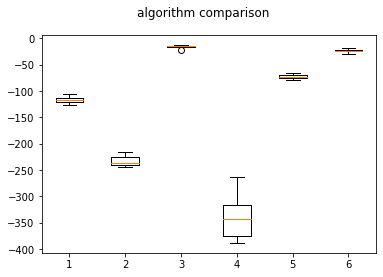

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]
models=[]
lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models.append(('lr',lr))
models.append(('knn',knn))
#models.append(('svm',svm))
models.append(('rf',rf))
#models.append(('nb',nb))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))  

for name,model in models:
    kfold=KFold(shuffle=True,n_splits=10,random_state=1)
    cv_results=cross_val_score(model,x,y,cv=kfold,scoring='neg_mean_squared_error') 
    results.append(cv_results)
    names.append(name)
    print("%s:%f (%f)" % (name,np.mean(cv_results),np.var(cv_results,ddof=1)))  ##we have 10 auc scores. we are taking its average.
    print("rmse value is",np.sqrt(abs(np.mean(cv_results))))
#boxplot algorithm comparison
fig=plt.figure()
fig.suptitle('algorithm comparison')
ax=fig.add_subplot(111)
plt.boxplot(results)
plt.show()

In [38]:
for name,algo in models:
    print(algo)
    model=algo.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=Non

In [39]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=lr.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/lr_base.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_base.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_base.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf_boost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rfboost_base.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=gboost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/gboost_base.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_base.csv')

,ID,Vehicles
0,20170701001,58.846862
1,20170701011,49.647648
2,20170701021,42.470634
3,20170701031,37.836066
4,20170701041,33.321462


#feature engineering

In [0]:
df1=df.copy()


In [0]:
datetimes = pd.to_datetime(df1['DateTime'])
df1['month'] = datetimes.dt.month
df1['year'] = datetimes.dt.year
df1['Day'] = datetimes.dt.day
df1['Day_Name'] = datetimes.dt.day_name()
df1['hour']=datetimes.dt.hour


##final dataframe after basic feature engineering (df1)

In [0]:
df_try=df1.copy()

In [43]:
df_try.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour
0,2015-11-01 00:00:00,1,15.0,1,11,2015,1,Sunday,0
1,2015-11-01 01:00:00,1,13.0,1,11,2015,1,Sunday,1
2,2015-11-01 02:00:00,1,10.0,1,11,2015,1,Sunday,2
3,2015-11-01 03:00:00,1,7.0,1,11,2015,1,Sunday,3
4,2015-11-01 04:00:00,1,9.0,1,11,2015,1,Sunday,4


In [0]:

def weekend(x):
  if x in ['Sunday','Saturday']:
    return(1)
  else:
    return(0)


def ampm(x):
  if x in[0,1,2,3,4,5,6,7,8,9,10,11]:
    return(0)
  else:
    return(1)


In [0]:
df_try['weekend']=df_try['Day_Name'].apply(weekend)
df_try['AM_PM']=df_try['hour'].apply(ampm)


In [46]:
df_try['AM_PM'].value_counts()

1    29964
0    29964
Name: AM_PM, dtype: int64

In [47]:
df_try.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DateTime    59928 non-null  datetime64[ns]
 1   Junction    59928 non-null  int64         
 2   Vehicles    48120 non-null  float64       
 3   train/test  59928 non-null  int64         
 4   month       59928 non-null  int64         
 5   year        59928 non-null  int64         
 6   Day         59928 non-null  int64         
 7   Day_Name    59928 non-null  object        
 8   hour        59928 non-null  int64         
 9   weekend     59928 non-null  int64         
 10  AM_PM       59928 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(8), object(1)
memory usage: 5.5+ MB


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_try['month']=le.fit_transform(df_try['month'])

In [0]:

df_try['year']=df_try['year'].astype('object')
df_try['Day']=df_try['Day'].astype('object')


df_try1=pd.get_dummies(data=df_try,columns=['Junction','year','Day','Day_Name'],drop_first=True)

In [50]:
df_try1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            59928 non-null  datetime64[ns]
 1   Vehicles            48120 non-null  float64       
 2   train/test          59928 non-null  int64         
 3   month               59928 non-null  int64         
 4   hour                59928 non-null  int64         
 5   weekend             59928 non-null  int64         
 6   AM_PM               59928 non-null  int64         
 7   Junction_2          59928 non-null  uint8         
 8   Junction_3          59928 non-null  uint8         
 9   Junction_4          59928 non-null  uint8         
 10  year_2016           59928 non-null  uint8         
 11  year_2017           59928 non-null  uint8         
 12  Day_2               59928 non-null  uint8         
 13  Day_3               59928 non-null  uint8     

In [51]:
train=df_try1[df_try1['train/test']==1]
test=df_try1[df_try1['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 45)
y_train shape is  (48120,)
x_test shape is  (11808, 45)


In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   13.503444805405586

**********************************rf**********************************
RMSE of model  :   1.4709910868660065

*******************************rf_boost*******************************
RMSE of model  :   18.120014453075928

********************************gboost********************************
RMSE of model  :   8.0985864852453

Learning rate set to 0.077778
0:	learn: 19.4577713	total: 8.76ms	remaining: 8.76s
1:	learn: 18.2868192	total: 17.1ms	remaining: 8.54s
2:	learn: 17.2281006	total: 24.8ms	remaining: 8.26s
3:	learn: 16.2732699	total: 32.7ms	remaining: 8.15s
4:	learn: 15.4173978	total: 40.7ms	remaining: 8.09s
5:	learn: 14.6550803	total: 48.3ms	remaining: 8s
6:	learn: 13.9543055	total: 55.9ms	remaining: 7.93s
7:	learn: 13.3208141	total: 63.6ms	remaining: 7.89s
8:	learn: 12.7518789	total: 71.4ms	remaining: 7.86s
9:	learn: 12.2496079	total: 79.6ms	remaining: 7.88s
10:	learn: 11.79

In [53]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_base1.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf_boost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rfboost_base1.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=gboost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/gboost_base1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_base1.csv')

,ID,Vehicles
0,20170701001,60.445212
1,20170701011,51.704365
2,20170701021,43.296315
3,20170701031,37.671086
4,20170701041,31.831715


#feature engineering - part 2


*   Target Encoding on "hour" feature to extract peak and non peak hours.



## best working dataframe

In [0]:
df_try2=df_try1.copy()

In [55]:
df_try2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            59928 non-null  datetime64[ns]
 1   Vehicles            48120 non-null  float64       
 2   train/test          59928 non-null  int64         
 3   month               59928 non-null  int64         
 4   hour                59928 non-null  int64         
 5   weekend             59928 non-null  int64         
 6   AM_PM               59928 non-null  int64         
 7   Junction_2          59928 non-null  uint8         
 8   Junction_3          59928 non-null  uint8         
 9   Junction_4          59928 non-null  uint8         
 10  year_2016           59928 non-null  uint8         
 11  year_2017           59928 non-null  uint8         
 12  Day_2               59928 non-null  uint8         
 13  Day_3               59928 non-null  uint8     

In [56]:
tr=df_try1[df_try1['train/test']==1]
a=pd.DataFrame(tr.groupby(['hour']).agg({"Vehicles":'mean'})).reindex()
a['Vehicles'].sort_values(ascending=True)

hour
5     12.173566
4     12.973067
6     12.980050
7     14.703242
3     14.847382
8     16.402993
2     17.102743
9     19.379551
1     19.654863
0     23.540648
10    24.229925
13    25.588529
23    25.635411
17    26.648379
16    26.674314
22    27.226933
11    27.495262
15    27.650374
14    27.702743
18    28.095262
21    28.202993
12    28.403990
20    29.824938
19    29.854863
Name: Vehicles, dtype: float64

In [0]:
def peak_nonpeak(x):
  if x==5:
    return (12.173566)
  elif (x==4):
    return(12.973067)
  elif (x==6):
    return(12.980050)
  elif (x==7):
    return(14.703242)
  elif (x==3):
    return(14.847382)
  elif (x==8):
    return(16.402993)
  elif (x==2):
    return(17.102743)  
  elif (x==9):
    return(19.379551)
  elif (x==1):
    return(19.654863)
  elif (x==0):
    return(23.540648)
  elif (x==10):
    return(24.229925)
  elif (x==13):
    return(25.588529)
  elif (x==23):
    return(25.635411)
  elif (x==17):
    return(26.648379)
  elif (x==16):
    return(26.674314)
  elif (x==22):
    return(27.226933)
  elif (x==11):
    return(27.495262)
  elif (x==15):
    return(27.650374)
  elif (x==14):
    return(27.702743)
  elif (x==18):
    return(28.095262)
  elif (x==21):
    return(28.202993)
  elif (x==12):
    return(28.403990)
  elif (x==20):
    return(29.824938)
  elif (x==19):
    return(29.854863)
  

In [0]:
df_try2['peak/non_peak']=df_try2['hour'].apply(peak_nonpeak)

In [59]:
df_try2.head()

,DateTime,Vehicles,train/test,month,hour,weekend,AM_PM,Junction_2,Junction_3,Junction_4,year_2016,year_2017,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,peak/non_peak
0,2015-11-01 00:00:00,15.0,1,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23.540648
1,2015-11-01 01:00:00,13.0,1,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19.654863
2,2015-11-01 02:00:00,10.0,1,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,17.102743
3,2015-11-01 03:00:00,7.0,1,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14.847382
4,2015-11-01 04:00:00,9.0,1,10,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12.973067


In [60]:
train=df_try2[df_try2['train/test']==1]
test=df_try2[df_try2['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   13.760052050008845

**********************************rf**********************************
RMSE of model  :   1.4989000123032865

*******************************rf_boost*******************************
RMSE of model  :   18.461461908133284

********************************gboost********************************
RMSE of model  :   7.988098545095699

Learning rate set to 0.077778
0:	learn: 19.4725211	total: 8.86ms	remaining: 8.85s
1:	learn: 18.2991134	total: 17.1ms	remaining: 8.53s
2:	learn: 17.2380800	total: 25.1ms	remaining: 8.34s
3:	learn: 16.2682773	total: 33.1ms	remaining: 8.25s
4:	learn: 15.3997799	total: 41.1ms	remaining: 8.18s
5:	learn: 14.6179763	total: 49.2ms	remaining: 8.15s
6:	learn: 13.8941819	total: 57.3ms	remaining: 8.13s
7:	learn: 13.2526722	total: 65.6ms	remaining: 8.13s
8:	learn: 12.6751129	total: 74.1ms	remaining: 8.16s
9:	learn: 12.1554115	total: 82.1ms	remaining: 8.13s
10:	learn: 

In [62]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe1.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf_boost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rfboost_basefe1.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=gboost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/gboost_basefe1.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe1.csv')

,ID,Vehicles
0,20170701001,60.533786
1,20170701011,49.933940
2,20170701021,42.737211
3,20170701031,36.679381
4,20170701041,31.308511


In [63]:
df_try2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            59928 non-null  datetime64[ns]
 1   Vehicles            48120 non-null  float64       
 2   train/test          59928 non-null  int64         
 3   month               59928 non-null  int64         
 4   hour                59928 non-null  int64         
 5   weekend             59928 non-null  int64         
 6   AM_PM               59928 non-null  int64         
 7   Junction_2          59928 non-null  uint8         
 8   Junction_3          59928 non-null  uint8         
 9   Junction_4          59928 non-null  uint8         
 10  year_2016           59928 non-null  uint8         
 11  year_2017           59928 non-null  uint8         
 12  Day_2               59928 non-null  uint8         
 13  Day_3               59928 non-null  uint8     

#feature engineering - part3

##### final dataframe to be used df_try2

In [0]:
df_try3=df_try2.copy()

In [65]:
tr=df_try3[df_try3['train/test']==1]
tr.groupby(['month']).agg({"Vehicles":"mean"})

,Vehicles
month,
0,19.727343
1,22.962312
2,23.073349
3,24.454365
4,24.633449
5,26.032143
6,21.837814
7,21.936380
8,25.644907


In [0]:
def month_traffic(x):
  if x==0:
    return (19.727343)
  elif (x==1):
    return(22.962312)
  elif (x==2):
    return(23.073349)
  elif (x==3):
    return(24.454365)
  elif (x==4):
    return(24.633449)
  elif (x==5):
    return(26.032143)
  elif (x==6):
    return(21.837814)  
  elif (x==7):
    return(21.936380)
  elif (x==8):
    return(25.644907)
  elif (x==9):
    return(26.551075)
  elif (x==10):
    return(19.534259)  
  elif (x==11):
    return(18.963934)


In [0]:
df_try3['month_traffic']=df_try3['month'].apply(month_traffic)

In [68]:
train=df_try3[df_try3['train/test']==1]
test=df_try3[df_try3['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 47)
y_train shape is  (48120,)
x_test shape is  (11808, 47)


In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   13.605721255149172

**********************************rf**********************************
RMSE of model  :   1.5028322194998183

*******************************rf_boost*******************************
RMSE of model  :   20.669292133766714

********************************gboost********************************
RMSE of model  :   8.020767329563002

Learning rate set to 0.077778
0:	learn: 19.4577713	total: 8.98ms	remaining: 8.97s
1:	learn: 18.2859455	total: 17.6ms	remaining: 8.8s
2:	learn: 17.2293025	total: 25.9ms	remaining: 8.6s
3:	learn: 16.2683031	total: 34.2ms	remaining: 8.52s
4:	learn: 15.3927942	total: 42.5ms	remaining: 8.46s
5:	learn: 14.6124536	total: 50.5ms	remaining: 8.36s
6:	learn: 13.9032747	total: 58.8ms	remaining: 8.34s
7:	learn: 13.2675388	total: 66.8ms	remaining: 8.29s
8:	learn: 12.6843105	total: 75ms	remaining: 8.26s
9:	learn: 12.1785381	total: 83.5ms	remaining: 8.27s
10:	learn: 11.7

In [70]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe2.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf_boost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rfboost_basefe2.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=gboost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/gboost_basefe2.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe2.csv')

,ID,Vehicles
0,20170701001,57.131999
1,20170701011,48.992635
2,20170701021,41.584435
3,20170701031,34.553005
4,20170701041,30.081437


#feature engineering

*   target encoding in feature "day_name"



In [0]:
df_try4=df_try2.copy()

In [0]:
#df_try2=df_try2.drop(columns=['day_name_priority'])


In [73]:
tr=df_try3[df_try3['train/test']==1]
tr.groupby(['weekend']).agg({"Vehicles":"mean"})

,Vehicles
weekend,
0,24.760163
1,17.834722


In [74]:
tr=df_try[df_try['train/test']==1]
tr.groupby(['Day_Name']).agg({"Vehicles":"mean"})

,Vehicles
Day_Name,
Friday,23.802120
Monday,24.409408
Saturday,18.544611
Sunday,17.134727
Thursday,25.152875
Tuesday,25.286731
Wednesday,25.149681


In [0]:
def day_traffic(x):
  if x=="Friday":
    return (23.802120)
  elif (x=='Monday'):
    return(24.409408)
  elif (x=="Saturday"):
    return(18.544611)
  elif (x=="Sunday"):
    return(17.134727)
  elif (x=="Thursday"):
    return(25.152875)
  elif (x=="Tuesday"):
    return(25.286731)
  elif (x=="Wednesday"):
    return(25.149681)  
 

In [0]:
df_try4['day_name_priority']=df_try['Day_Name'].apply(day_traffic)

In [77]:
df_try4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            59928 non-null  datetime64[ns]
 1   Vehicles            48120 non-null  float64       
 2   train/test          59928 non-null  int64         
 3   month               59928 non-null  int64         
 4   hour                59928 non-null  int64         
 5   weekend             59928 non-null  int64         
 6   AM_PM               59928 non-null  int64         
 7   Junction_2          59928 non-null  uint8         
 8   Junction_3          59928 non-null  uint8         
 9   Junction_4          59928 non-null  uint8         
 10  year_2016           59928 non-null  uint8         
 11  year_2017           59928 non-null  uint8         
 12  Day_2               59928 non-null  uint8         
 13  Day_3               59928 non-null  uint8     

In [78]:
train=df_try4[df_try4['train/test']==1]
test=df_try4[df_try4['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 47)
y_train shape is  (48120,)
x_test shape is  (11808, 47)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   13.75416938222175

**********************************rf**********************************
RMSE of model  :   1.4985967341663993

*******************************rf_boost*******************************
RMSE of model  :   19.303344515198177

********************************gboost********************************
RMSE of model  :   8.034742066334962

Learning rate set to 0.077778
0:	learn: 19.4577713	total: 8.82ms	remaining: 8.81s
1:	learn: 18.2859455	total: 16.9ms	remaining: 8.43s
2:	learn: 17.2293025	total: 25.3ms	remaining: 8.4s
3:	learn: 16.2683031	total: 33.5ms	remaining: 8.35s
4:	learn: 15.3968616	total: 41.2ms	remaining: 8.2s
5:	learn: 14.6217160	total: 49ms	remaining: 8.11s
6:	learn: 13.9075147	total: 57ms	remaining: 8.08s
7:	learn: 13.2653460	total: 64.8ms	remaining: 8.04s
8:	learn: 12.6844328	total: 72.8ms	remaining: 8.01s
9:	learn: 12.1803687	total: 80.7ms	remaining: 7.99s
10:	learn: 11.7094

In [80]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe3.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe3.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf_boost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rfboost_basefe3.csv')

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=gboost.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/gboost_basefe3.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe3.csv')

,ID,Vehicles
0,20170701001,61.264858
1,20170701011,51.227799
2,20170701021,43.847580
3,20170701031,37.385588
4,20170701041,31.632153


#feature engineering

*   removing day_name dummies



In [0]:
# best dataframe df_try4

In [82]:
df_try4.columns

Index(['DateTime', 'Vehicles', 'train/test', 'month', 'hour', 'weekend',
       'AM_PM', 'Junction_2', 'Junction_3', 'Junction_4', 'year_2016',
       'year_2017', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7',
       'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14',
       'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21',
       'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28',
       'Day_29', 'Day_30', 'Day_31', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'peak/non_peak', 'day_name_priority'],
      dtype='object')

In [0]:
df_try5=df_try4.drop(columns=['Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday'],axis=1)

In [84]:
train=df_try5[df_try5['train/test']==1]
test=df_try5[df_try5['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 41)
y_train shape is  (48120,)
x_test shape is  (11808, 41)


In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   13.631828129587516

**********************************rf**********************************
RMSE of model  :   1.510793728868602

*******************************rf_boost*******************************
RMSE of model  :   17.167073057186165

********************************gboost********************************
RMSE of model  :   7.974170709981412

Learning rate set to 0.077778
0:	learn: 19.4577713	total: 8.6ms	remaining: 8.59s
1:	learn: 18.2868192	total: 16.6ms	remaining: 8.26s
2:	learn: 17.2169645	total: 24.4ms	remaining: 8.1s
3:	learn: 16.2514510	total: 32.1ms	remaining: 7.99s
4:	learn: 15.3820661	total: 40ms	remaining: 7.95s
5:	learn: 14.5952755	total: 47.5ms	remaining: 7.88s
6:	learn: 13.8822093	total: 55.2ms	remaining: 7.83s
7:	learn: 13.2402903	total: 62.7ms	remaining: 7.78s
8:	learn: 12.6676965	total: 70.6ms	remaining: 7.77s
9:	learn: 12.1473345	total: 78.2ms	remaining: 7.75s
10:	learn: 11.67

In [86]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe5.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe5.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe5.csv')

,ID,Vehicles
0,20170701001,59.293159
1,20170701011,50.921890
2,20170701021,43.183476
3,20170701031,35.742937
4,20170701041,31.316285


#feature engineering


*   Target encoding in "junction" feature


df_try4 (final)

In [0]:
df_try6=df_try4.copy()

In [88]:
df_try6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            59928 non-null  datetime64[ns]
 1   Vehicles            48120 non-null  float64       
 2   train/test          59928 non-null  int64         
 3   month               59928 non-null  int64         
 4   hour                59928 non-null  int64         
 5   weekend             59928 non-null  int64         
 6   AM_PM               59928 non-null  int64         
 7   Junction_2          59928 non-null  uint8         
 8   Junction_3          59928 non-null  uint8         
 9   Junction_4          59928 non-null  uint8         
 10  year_2016           59928 non-null  uint8         
 11  year_2017           59928 non-null  uint8         
 12  Day_2               59928 non-null  uint8         
 13  Day_3               59928 non-null  uint8     

In [89]:
tr=df_try[df_try['train/test']==1]
tr.groupby(['Junction']).agg({"Vehicles":"mean"})

,Vehicles
Junction,
1,45.052906
2,14.253221
3,13.694010
4,7.251611


In [0]:
def junction_priority(x):
  if x==1:
    return (45.052906)
  elif (x==2):
    return(14.253221)
  elif (x==3):
    return(13.694010)
  elif (x==4):
    return(7.251611)

In [0]:
df_try6['junction_priority']=df_try['Junction'].apply(junction_priority)

In [92]:
train=df_try6[df_try6['train/test']==1]
test=df_try6[df_try6['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 48)
y_train shape is  (48120,)
x_test shape is  (11808, 48)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.730789389314593

**********************************rf**********************************
RMSE of model  :   1.459186283279163

*******************************rf_boost*******************************
RMSE of model  :   11.469247076328678

********************************gboost********************************
RMSE of model  :   6.53232227754734

Learning rate set to 0.077778
0:	learn: 19.4522621	total: 9.17ms	remaining: 9.16s
1:	learn: 18.2178051	total: 18ms	remaining: 8.97s
2:	learn: 17.1280636	total: 26.8ms	remaining: 8.89s
3:	learn: 16.1282419	total: 35.4ms	remaining: 8.81s
4:	learn: 15.1823243	total: 44.1ms	remaining: 8.77s
5:	learn: 14.3250907	total: 53ms	remaining: 8.78s
6:	learn: 13.5598137	total: 61.5ms	remaining: 8.73s
7:	learn: 12.8944080	total: 70.2ms	remaining: 8.71s
8:	learn: 12.2679766	total: 79.1ms	remaining: 8.71s
9:	learn: 11.7121359	total: 87.5ms	remaining: 8.66s
10:	learn: 11.2059

In [94]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe6.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe6.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe6.csv')

,ID,Vehicles
0,20170701001,61.522513
1,20170701011,52.925826
2,20170701021,44.788326
3,20170701031,38.205104
4,20170701041,31.762557


#feature engineering - day_priority (target encoding for date)

In [95]:
df_try6.columns

Index(['DateTime', 'Vehicles', 'train/test', 'month', 'hour', 'weekend',
       'AM_PM', 'Junction_2', 'Junction_3', 'Junction_4', 'year_2016',
       'year_2017', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7',
       'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14',
       'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21',
       'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28',
       'Day_29', 'Day_30', 'Day_31', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'peak/non_peak', 'day_name_priority',
       'junction_priority'],
      dtype='object')

In [0]:
df_try7=df_try6.copy()

####taking mean of target for each date.

In [97]:
tr=df_try[df_try['train/test']==1]
d_df=pd.DataFrame(tr.groupby(['Day']).agg({"Vehicles":"mean"})).reindex()
d_df

,Vehicles
Day,
1,21.891414
2,22.864268
3,22.316288
4,21.298611
5,21.570076
6,22.208965
7,21.938131
8,22.209596
9,22.999369


In [98]:
day_list=list(d_df.index)
day_list

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31]

In [99]:
vehicles_list=list(d_df['Vehicles'].values)
vehicles_list

[21.891414141414142,
 22.86426767676768,
 22.31628787878788,
 21.29861111111111,
 21.570075757575758,
 22.208964646464647,
 21.93813131313131,
 22.20959595959596,
 22.99936868686869,
 22.331439393939394,
 21.23926767676768,
 22.158459595959595,
 22.202651515151516,
 21.76010101010101,
 22.73169191919192,
 23.150883838383837,
 22.597853535353536,
 22.733585858585858,
 23.656565656565657,
 24.200757575757574,
 24.017676767676768,
 24.293560606060606,
 25.18686868686869,
 23.821969696969695,
 22.324494949494948,
 22.44128787878788,
 23.156565656565657,
 23.542929292929294,
 23.517473118279568,
 23.818502824858758,
 22.26273148148148]

In [0]:
dict1=dict(zip())


In [101]:
len(vehicles_list)

31

In [102]:
dic1=dict(zip(day_list,vehicles_list))
dic1

{1: 21.891414141414142,
 2: 22.86426767676768,
 3: 22.31628787878788,
 4: 21.29861111111111,
 5: 21.570075757575758,
 6: 22.208964646464647,
 7: 21.93813131313131,
 8: 22.20959595959596,
 9: 22.99936868686869,
 10: 22.331439393939394,
 11: 21.23926767676768,
 12: 22.158459595959595,
 13: 22.202651515151516,
 14: 21.76010101010101,
 15: 22.73169191919192,
 16: 23.150883838383837,
 17: 22.597853535353536,
 18: 22.733585858585858,
 19: 23.656565656565657,
 20: 24.200757575757574,
 21: 24.017676767676768,
 22: 24.293560606060606,
 23: 25.18686868686869,
 24: 23.821969696969695,
 25: 22.324494949494948,
 26: 22.44128787878788,
 27: 23.156565656565657,
 28: 23.542929292929294,
 29: 23.517473118279568,
 30: 23.818502824858758,
 31: 22.26273148148148}

#### function to get mean value of target column for each date

In [0]:
def day_priority(x):
  for k,j in dic1.items():
    if x==k:
      return(j)


In [0]:
df_try7['date_priority']=df_try['Day'].apply(day_priority)

In [0]:
df_try71=df_try7.drop(columns=['Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7',
       'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14',
       'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21',
       'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28',
       'Day_29', 'Day_30', 'Day_31'],axis=1)

In [106]:
train=df_try71[df_try71['train/test']==1]
test=df_try71[df_try71['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 19)
y_train shape is  (48120,)
x_test shape is  (11808, 19)


In [107]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   5.123404806179193

**********************************rf**********************************
RMSE of model  :   1.4558640824325053

*******************************rf_boost*******************************
RMSE of model  :   11.481351912042882

********************************gboost********************************
RMSE of model  :   6.47617437754629

Learning rate set to 0.077778
0:	learn: 19.3997176	total: 9.23ms	remaining: 9.23s
1:	learn: 18.2238179	total: 17.7ms	remaining: 8.83s
2:	learn: 17.1113855	total: 25.9ms	remaining: 8.61s
3:	learn: 16.1196520	total: 34.5ms	remaining: 8.6s
4:	learn: 15.1762918	total: 42.9ms	remaining: 8.54s
5:	learn: 14.3391159	total: 51.1ms	remaining: 8.47s
6:	learn: 13.5906926	total: 59.8ms	remaining: 8.48s
7:	learn: 12.8863749	total: 68.5ms	remaining: 8.49s
8:	learn: 12.2637367	total: 76.9ms	remaining: 8.47s
9:	learn: 11.7013941	total: 85.3ms	remaining: 8.45s
10:	learn: 11.

In [108]:

id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe71.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe71.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe71.csv')

,ID,Vehicles
0,20170701001,59.216412
1,20170701011,51.650042
2,20170701021,42.113133
3,20170701031,35.377854
4,20170701041,30.253860


#feature engineering
(df_try6-best)

In [0]:
df_try8=df_try6.copy()

In [110]:
df_try8.head()

,DateTime,Vehicles,train/test,month,hour,weekend,AM_PM,Junction_2,Junction_3,Junction_4,year_2016,year_2017,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,peak/non_peak,day_name_priority,junction_priority
0,2015-11-01 00:00:00,15.0,1,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23.540648,17.134727,45.052906
1,2015-11-01 01:00:00,13.0,1,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19.654863,17.134727,45.052906
2,2015-11-01 02:00:00,10.0,1,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,17.102743,17.134727,45.052906
3,2015-11-01 03:00:00,7.0,1,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14.847382,17.134727,45.052906
4,2015-11-01 04:00:00,9.0,1,10,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12.973067,17.134727,45.052906


In [111]:
df_try8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 51 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DateTime            59928 non-null  datetime64[ns]
 1   Vehicles            48120 non-null  float64       
 2   train/test          59928 non-null  int64         
 3   month               59928 non-null  int64         
 4   hour                59928 non-null  int64         
 5   weekend             59928 non-null  int64         
 6   AM_PM               59928 non-null  int64         
 7   Junction_2          59928 non-null  uint8         
 8   Junction_3          59928 non-null  uint8         
 9   Junction_4          59928 non-null  uint8         
 10  year_2016           59928 non-null  uint8         
 11  year_2017           59928 non-null  uint8         
 12  Day_2               59928 non-null  uint8         
 13  Day_3               59928 non-null  uint8     

In [112]:
df_try8.columns

Index(['DateTime', 'Vehicles', 'train/test', 'month', 'hour', 'weekend',
       'AM_PM', 'Junction_2', 'Junction_3', 'Junction_4', 'year_2016',
       'year_2017', 'Day_2', 'Day_3', 'Day_4', 'Day_5', 'Day_6', 'Day_7',
       'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12', 'Day_13', 'Day_14',
       'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19', 'Day_20', 'Day_21',
       'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26', 'Day_27', 'Day_28',
       'Day_29', 'Day_30', 'Day_31', 'Day_Name_Monday', 'Day_Name_Saturday',
       'Day_Name_Sunday', 'Day_Name_Thursday', 'Day_Name_Tuesday',
       'Day_Name_Wednesday', 'peak/non_peak', 'day_name_priority',
       'junction_priority'],
      dtype='object')

In [113]:
tr=df_try[df_try['train/test']==1]
d_df=pd.DataFrame(tr.groupby(['month','Day']).agg({"Vehicles":"mean"}))
d_df

Vehicles
month Day           
0     1     9.494048
      2    15.351190
      3    18.494048
      4    21.541667
      5    21.494048
...              ...
11    27   16.583333
      28   18.305556
      29   18.993056
      30   18.298611
      31   13.340278

[366 rows x 1 columns]

In [0]:
def month_to_labels(x):
  if x==0:
    return("a")
  elif x==1:
    return("b")
  elif x==2:
    return("c")
  elif x==3:
    return("d")
  elif x==4:
    return("e")
  elif x==5:
    return("f")
  elif x==6:
    return("g")
  elif x==7:
    return("h")
  elif x==8:
    return("i")
  elif x==9:
    return("j")
  elif x==10:
    return("k")
  elif x==11:
    return("l")

In [0]:
df_comb=df_try.copy()

In [0]:
df_comb[['month','Day']] = df_comb[['month','Day']].astype('object')

In [0]:
df_comb['month_in_labels']=df_comb['month'].apply(month_to_labels)

In [0]:
df_comb['day_to_labels']=df_comb['Day'].map({1:'a',2:"b",3:'c',4:'d',5:"e",6:"f",7:"g",8:'h',9:"i",10:"j",11:"k",12:"l",13:"m",
                                             14:"n",15:"o",16:"p",17:"q",18:"r",19:"s",20:"t",21:"u",22:"v",23:"w",24:"x",25:"y",26:"z",
                                             27:"aa",28:"bb",29:"cc",30:"dd",31:"ee" })

In [0]:
df_comb['month+date+final']=df_comb['month_in_labels']+df_comb['day_to_labels']

In [121]:
df_comb

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour,weekend,AM_PM,month_in_labels,day_to_labels,month+date+final
0,2015-11-01 00:00:00,1,15.0,1,10,2015,1,Sunday,0,1,0,k,a,ka
1,2015-11-01 01:00:00,1,13.0,1,10,2015,1,Sunday,1,1,0,k,a,ka
2,2015-11-01 02:00:00,1,10.0,1,10,2015,1,Sunday,2,1,0,k,a,ka
3,2015-11-01 03:00:00,1,7.0,1,10,2015,1,Sunday,3,1,0,k,a,ka
4,2015-11-01 04:00:00,1,9.0,1,10,2015,1,Sunday,4,1,0,k,a,ka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11803,2017-10-31 19:00:00,4,NaN,0,9,2017,31,Tuesday,19,0,1,j,ee,jee
11804,2017-10-31 20:00:00,4,NaN,0,9,2017,31,Tuesday,20,0,1,j,ee,jee
11805,2017-10-31 21:00:00,4,NaN,0,9,2017,31,Tuesday,21,0,1,j,ee,jee
11806,2017-10-31 22:00:00,4,NaN,0,9,2017,31,Tuesday,22,0,1,j,ee,jee


In [122]:
tr=df_comb[df_comb['train/test']==1]
d_df=pd.DataFrame(tr.groupby(["month+date+final"]).agg({"Vehicles":"mean"}))
d_df

,Vehicles
month+date+final,
aa,9.494048
aaa,21.613095
ab,15.351190
abb,19.809524
ac,18.494048
...,...
lv,19.652778
lw,17.194444
lx,13.944444


In [123]:
d_dff=d_df.reset_index()
d_dff

,month+date+final,Vehicles
0,aa,9.494048
1,aaa,21.613095
2,ab,15.351190
3,abb,19.809524
4,ac,18.494048
...,...,...
361,lv,19.652778
362,lw,17.194444
363,lx,13.944444
364,ly,11.347222


In [124]:

dic=dict(zip(list(d_dff['month+date+final']),list(d_dff['Vehicles'])))
dic


{'aa': 9.494047619047619,
 'aaa': 21.613095238095237,
 'ab': 15.351190476190476,
 'abb': 19.80952380952381,
 'ac': 18.49404761904762,
 'acc': 19.160714285714285,
 'ad': 21.541666666666668,
 'add': 23.803571428571427,
 'ae': 21.49404761904762,
 'aee': 23.113095238095237,
 'af': 19.99404761904762,
 'ag': 18.636904761904763,
 'ah': 18.714285714285715,
 'ai': 20.988095238095237,
 'aj': 19.672619047619047,
 'ak': 20.898809523809526,
 'al': 20.672619047619047,
 'am': 19.238095238095237,
 'an': 15.488095238095237,
 'ao': 17.273809523809526,
 'ap': 21.029761904761905,
 'aq': 20.63095238095238,
 'ar': 22.529761904761905,
 'as': 22.642857142857142,
 'at': 21.160714285714285,
 'au': 17.857142857142858,
 'av': 18.071428571428573,
 'aw': 20.672619047619047,
 'ax': 20.839285714285715,
 'ay': 21.708333333333332,
 'az': 18.952380952380953,
 'ba': 23.720238095238095,
 'baa': 23.607142857142858,
 'bb': 24.404761904761905,
 'bbb': 24.285714285714285,
 'bc': 23.61904761904762,
 'bcc': 23.416666666666668,


In [0]:
def month_day_priority(x):
  for k,j in dic.items():
    if x==k:
      return(j)
df_comb['month_date_targetvalue']=df_comb['month+date+final'].apply(month_day_priority)

In [0]:
df_try8['month_day_combo']=df_comb['month_date_targetvalue']

In [127]:
train=df_try8[df_try8['train/test']==1]
test=df_try8[df_try8['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 49)
y_train shape is  (48120,)
x_test shape is  (11808, 49)


In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.922496072222646

**********************************rf**********************************
RMSE of model  :   1.3722120803104594

*******************************rf_boost*******************************
RMSE of model  :   14.814705011806621

********************************gboost********************************
RMSE of model  :   6.211282402494681

Learning rate set to 0.077778
0:	learn: 19.4315402	total: 9.7ms	remaining: 9.69s
1:	learn: 18.2137926	total: 18.8ms	remaining: 9.36s
2:	learn: 17.1124570	total: 27.7ms	remaining: 9.21s
3:	learn: 16.0786743	total: 37.2ms	remaining: 9.27s
4:	learn: 15.1382343	total: 46.4ms	remaining: 9.24s
5:	learn: 14.2993535	total: 55.7ms	remaining: 9.23s
6:	learn: 13.5510754	total: 65ms	remaining: 9.22s
7:	learn: 12.8611549	total: 74.3ms	remaining: 9.22s
8:	learn: 12.2145058	total: 83.7ms	remaining: 9.21s
9:	learn: 11.6563951	total: 93ms	remaining: 9.21s
10:	learn: 11.170

In [129]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe81.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe81.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe81.csv')

,ID,Vehicles
0,20170701001,56.632852
1,20170701011,49.399924
2,20170701021,41.644399
3,20170701031,35.687193
4,20170701041,30.114354


#feature engineering (target encoding in "month")

In [130]:
tr=df_try[df_try['train/test']==1]
d_df=pd.DataFrame(tr.groupby(['month','Day']).agg({"Vehicles":"mean"}))
d_df

Vehicles
month Day           
0     1     9.494048
      2    15.351190
      3    18.494048
      4    21.541667
      5    21.494048
...              ...
11    27   16.583333
      28   18.305556
      29   18.993056
      30   18.298611
      31   13.340278

[366 rows x 1 columns]

In [131]:
df_try9=df_try6.copy()
df_try9.head()

,DateTime,Vehicles,train/test,month,hour,weekend,AM_PM,Junction_2,Junction_3,Junction_4,year_2016,year_2017,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,peak/non_peak,day_name_priority,junction_priority
0,2015-11-01 00:00:00,15.0,1,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23.540648,17.134727,45.052906
1,2015-11-01 01:00:00,13.0,1,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19.654863,17.134727,45.052906
2,2015-11-01 02:00:00,10.0,1,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,17.102743,17.134727,45.052906
3,2015-11-01 03:00:00,7.0,1,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14.847382,17.134727,45.052906
4,2015-11-01 04:00:00,9.0,1,10,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12.973067,17.134727,45.052906


In [132]:
tr=df_try[df_try['train/test']==1]
tr.groupby(['month']).agg({"Vehicles":"mean"})

,Vehicles
month,
0,19.727343
1,22.962312
2,23.073349
3,24.454365
4,24.633449
5,26.032143
6,21.837814
7,21.936380
8,25.644907


In [0]:
df_try9['month_priority']=df_try9['month'].map({0:19.727343,1:22.962312,2:23.073349,3:24.454365,4:24.633449,5:26.032143,6:21.837814,
                                                7:21.936380,8:25.644907,9:26.551075,10:19.534259,11:18.963934  })

In [134]:
train=df_try9[df_try9['train/test']==1]
test=df_try9[df_try9['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 49)
y_train shape is  (48120,)
x_test shape is  (11808, 49)


In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.694123685389248

**********************************rf**********************************
RMSE of model  :   1.475996877721086

*******************************rf_boost*******************************
RMSE of model  :   13.98755043640984

********************************gboost********************************
RMSE of model  :   6.460823401964082

Learning rate set to 0.077778
0:	learn: 19.4315402	total: 9.2ms	remaining: 9.19s
1:	learn: 18.2137926	total: 17.7ms	remaining: 8.82s
2:	learn: 17.1124570	total: 26.4ms	remaining: 8.77s
3:	learn: 16.0786743	total: 35.1ms	remaining: 8.75s
4:	learn: 15.1382343	total: 44.3ms	remaining: 8.81s
5:	learn: 14.2819619	total: 63ms	remaining: 10.4s
6:	learn: 13.5466040	total: 72.5ms	remaining: 10.3s
7:	learn: 12.8519410	total: 81.3ms	remaining: 10.1s
8:	learn: 12.2177060	total: 90.5ms	remaining: 9.96s
9:	learn: 11.6492436	total: 99.3ms	remaining: 9.83s
10:	learn: 11.132

In [136]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe9.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe9.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe9.csv')

,ID,Vehicles
0,20170701001,58.336984
1,20170701011,49.125847
2,20170701021,41.961871
3,20170701031,35.589404
4,20170701041,30.334416


In [0]:
#removing month column and retaining the priority value

In [138]:
df_try9.head()

,DateTime,Vehicles,train/test,month,hour,weekend,AM_PM,Junction_2,Junction_3,Junction_4,year_2016,year_2017,Day_2,Day_3,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_30,Day_31,Day_Name_Monday,Day_Name_Saturday,Day_Name_Sunday,Day_Name_Thursday,Day_Name_Tuesday,Day_Name_Wednesday,peak/non_peak,day_name_priority,junction_priority,month_priority
0,2015-11-01 00:00:00,15.0,1,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,23.540648,17.134727,45.052906,19.534259
1,2015-11-01 01:00:00,13.0,1,10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,19.654863,17.134727,45.052906,19.534259
2,2015-11-01 02:00:00,10.0,1,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,17.102743,17.134727,45.052906,19.534259
3,2015-11-01 03:00:00,7.0,1,10,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,14.847382,17.134727,45.052906,19.534259
4,2015-11-01 04:00:00,9.0,1,10,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,12.973067,17.134727,45.052906,19.534259


In [139]:
train=df_try9[df_try9['train/test']==1]
test=df_try9[df_try9['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime","month"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime","month"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 48)
y_train shape is  (48120,)
x_test shape is  (11808, 48)


In [140]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   5.207467941405377

**********************************rf**********************************
RMSE of model  :   1.4878523109397466

*******************************rf_boost*******************************
RMSE of model  :   12.439727076476235

********************************gboost********************************
RMSE of model  :   6.7117672433107405

Learning rate set to 0.077778
0:	learn: 19.4148741	total: 8.81ms	remaining: 8.8s
1:	learn: 18.2022409	total: 17.5ms	remaining: 8.71s
2:	learn: 17.1104975	total: 26ms	remaining: 8.65s
3:	learn: 16.1158985	total: 34.3ms	remaining: 8.54s
4:	learn: 15.2222810	total: 42.9ms	remaining: 8.54s
5:	learn: 14.4250240	total: 51.6ms	remaining: 8.55s
6:	learn: 13.6889841	total: 60.1ms	remaining: 8.53s
7:	learn: 13.0355921	total: 69ms	remaining: 8.56s
8:	learn: 12.4145097	total: 77.5ms	remaining: 8.53s
9:	learn: 11.8684711	total: 85.9ms	remaining: 8.5s
10:	learn: 11.361

In [141]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe91.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe91.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe91.csv')

,ID,Vehicles
0,20170701001,57.393249
1,20170701011,48.785517
2,20170701021,41.970494
3,20170701031,35.042348
4,20170701041,30.360008


#feature engineering - target encoding on month+junction combination

In [0]:
df_try10=df_try6.copy()

In [143]:
tr=df_try[df_try['train/test']==1]
d_df=pd.DataFrame(tr.groupby(['month','Junction']).agg({"Vehicles":"mean"}))
d_df

Vehicles
month Junction           
0     1         41.249328
      2         11.168011
      3         12.879704
      4          7.497312
1     1         46.000731
      2         14.532895
      3         15.565789
      4          8.279762
2     1         46.590054
      2         16.082661
      3         14.770161
      4          6.627688
3     1         46.865278
      2         16.838194
      3         18.793750
      4          6.186111
4     1         51.899866
      2         18.364247
      3         12.675403
      4          6.555108
5     1         55.079167
      2         18.794444
      3         13.004861
      4          8.468056
6     1         39.127688
      2         11.534946
      3         14.850806
7     1         41.915323
      2         11.071237
      3         12.822581
8     1         47.741667
      2         12.590278
      3         16.602778
9     1         50.032258
      2         13.955645
      3         15.665323
10    1         36.776389
      2         11.434722
      3         10.391667
11    1         36.894489
      2         10.875672
      3          9.121640

In [144]:
d_dff=d_df.reset_index()
d_dff

,month,Junction,Vehicles
0,0,1,41.249328
1,0,2,11.168011
2,0,3,12.879704
3,0,4,7.497312
4,1,1,46.000731
5,1,2,14.532895
6,1,3,15.565789
7,1,4,8.279762
8,2,1,46.590054
9,2,2,16.082661


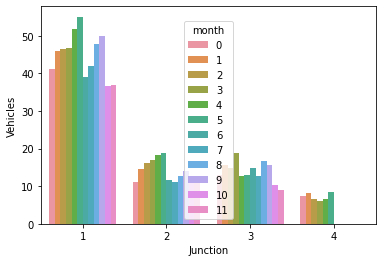

In [145]:
sns.barplot(x='Junction',y='Vehicles',hue='month',data=d_dff)
plt.show()

#####inference:

*  junction 1 is very important as average vehicles count throught the span of observation is very high. 
*  junction 4 is less impotant as the average vehicles passing through is comparitively less. interestingly, vehicles through this junction during months of 8,9,10,11 are zero.



In [0]:
df_comb['junction_in_labels']=df_comb['Junction'].map({1:"a",2:"b",3:"c",4:"d"})

In [147]:
df_comb['month_junction_combo']=df_comb['month_in_labels']+df_comb['junction_in_labels']
df_comb.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour,weekend,AM_PM,month_in_labels,day_to_labels,month+date+final,month_date_targetvalue,junction_in_labels,month_junction_combo
0,2015-11-01 00:00:00,1,15.0,1,10,2015,1,Sunday,0,1,0,k,a,ka,17.694444,a,ka
1,2015-11-01 01:00:00,1,13.0,1,10,2015,1,Sunday,1,1,0,k,a,ka,17.694444,a,ka
2,2015-11-01 02:00:00,1,10.0,1,10,2015,1,Sunday,2,1,0,k,a,ka,17.694444,a,ka
3,2015-11-01 03:00:00,1,7.0,1,10,2015,1,Sunday,3,1,0,k,a,ka,17.694444,a,ka
4,2015-11-01 04:00:00,1,9.0,1,10,2015,1,Sunday,4,1,0,k,a,ka,17.694444,a,ka


In [148]:
df_comb.isnull().sum()

DateTime                      0
Junction                      0
Vehicles                  11808
train/test                    0
month                         0
year                          0
Day                           0
Day_Name                      0
hour                          0
weekend                       0
AM_PM                         0
month_in_labels               0
day_to_labels                 0
month+date+final              0
month_date_targetvalue        0
junction_in_labels            0
month_junction_combo          0
dtype: int64

In [149]:
tr=df_comb[df_comb['train/test']==1]
df_f=tr.groupby(['month_junction_combo']).agg({"Vehicles":"mean"})
df_ff=df_f.reset_index()
df_ff

,month_junction_combo,Vehicles
0,aa,41.249328
1,ab,11.168011
2,ac,12.879704
3,ad,7.497312
4,ba,46.000731
5,bb,14.532895
6,bc,15.565789
7,bd,8.279762
8,ca,46.590054
9,cb,16.082661


In [150]:
df_ff.isnull().sum()

month_junction_combo    0
Vehicles                0
dtype: int64

In [151]:
dic3=dict(zip(list(df_ff['month_junction_combo']),list(df_ff['Vehicles'])))
dic3


{'aa': 41.24932795698925,
 'ab': 11.168010752688172,
 'ac': 12.879704301075268,
 'ad': 7.497311827956989,
 'ba': 46.00073099415204,
 'bb': 14.532894736842104,
 'bc': 15.56578947368421,
 'bd': 8.279761904761905,
 'ca': 46.590053763440864,
 'cb': 16.08266129032258,
 'cc': 14.77016129032258,
 'cd': 6.627688172043011,
 'da': 46.86527777777778,
 'db': 16.838194444444444,
 'dc': 18.79375,
 'dd': 6.186111111111111,
 'ea': 51.89986559139785,
 'eb': 18.364247311827956,
 'ec': 12.675403225806452,
 'ed': 6.55510752688172,
 'fa': 55.079166666666666,
 'fb': 18.794444444444444,
 'fc': 13.004861111111111,
 'fd': 8.468055555555555,
 'ga': 39.12768817204301,
 'gb': 11.53494623655914,
 'gc': 14.850806451612904,
 'ha': 41.91532258064516,
 'hb': 11.071236559139784,
 'hc': 12.82258064516129,
 'ia': 47.74166666666667,
 'ib': 12.590277777777779,
 'ic': 16.602777777777778,
 'ja': 50.03225806451613,
 'jb': 13.955645161290322,
 'jc': 15.665322580645162,
 'ka': 36.77638888888889,
 'kb': 11.434722222222222,
 'kc'

In [0]:
def month_junction_priority(x):
  for k,j in dic3.items():
    if x==k:
      return(j)
df_comb['month_junction_targetvalue']=df_comb['month_junction_combo'].apply(month_junction_priority)

In [0]:
df_try10['month_junction_priority']=df_comb['month_junction_targetvalue']

In [154]:
df_try10[df_try10['train/test']==0].isnull().sum()

DateTime                       0
Vehicles                   11808
train/test                     0
month                          0
hour                           0
weekend                        0
AM_PM                          0
Junction_2                     0
Junction_3                     0
Junction_4                     0
year_2016                      0
year_2017                      0
Day_2                          0
Day_3                          0
Day_4                          0
Day_5                          0
Day_6                          0
Day_7                          0
Day_8                          0
Day_9                          0
Day_10                         0
Day_11                         0
Day_12                         0
Day_13                         0
Day_14                         0
Day_15                         0
Day_16                         0
Day_17                         0
Day_18                         0
Day_19                         0
Day_20    

In [155]:
train=df_try10[df_try10['train/test']==1]
test=df_try10[df_try10['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 49)
y_train shape is  (48120,)
x_test shape is  (11808, 49)


In [156]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.659009184745309

**********************************rf**********************************
RMSE of model  :   1.4676066704509485

*******************************rf_boost*******************************
RMSE of model  :   11.57410720396338

********************************gboost********************************
RMSE of model  :   6.208550360630582

Learning rate set to 0.077778
0:	learn: 19.4315402	total: 9.15ms	remaining: 9.14s
1:	learn: 18.2137926	total: 17.9ms	remaining: 8.91s
2:	learn: 17.1124570	total: 26.4ms	remaining: 8.78s
3:	learn: 16.0786743	total: 35ms	remaining: 8.7s
4:	learn: 15.1382343	total: 43.9ms	remaining: 8.74s
5:	learn: 14.2819619	total: 53ms	remaining: 8.79s
6:	learn: 13.5411220	total: 62.5ms	remaining: 8.87s
7:	learn: 12.8461863	total: 71.7ms	remaining: 8.89s
8:	learn: 12.2089027	total: 80.7ms	remaining: 8.89s
9:	learn: 11.6397490	total: 89.4ms	remaining: 8.85s
10:	learn: 11.1248

#label encoding junction

In [0]:
df_try11=df_try6.drop(columns=['Junction_2', 'Junction_3', 'Junction_4'],axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [165]:
df_try11['Junction_labelencoded']=le.fit_transform(df_try['Junction'])
df_try11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               59928 non-null  datetime64[ns]
 1   Vehicles               48120 non-null  float64       
 2   train/test             59928 non-null  int64         
 3   month                  59928 non-null  int64         
 4   hour                   59928 non-null  int64         
 5   weekend                59928 non-null  int64         
 6   AM_PM                  59928 non-null  int64         
 7   year_2016              59928 non-null  uint8         
 8   year_2017              59928 non-null  uint8         
 9   Day_2                  59928 non-null  uint8         
 10  Day_3                  59928 non-null  uint8         
 11  Day_4                  59928 non-null  uint8         
 12  Day_5                  59928 non-null  uint8         
 13  D

In [167]:
train=df_try11[df_try11['train/test']==1]
test=df_try11[df_try11['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.770639631513324

**********************************rf**********************************
RMSE of model  :   1.4797530572892699

*******************************rf_boost*******************************
RMSE of model  :   13.18039760004473

********************************gboost********************************
RMSE of model  :   6.513883330512903

Learning rate set to 0.077778
0:	learn: 19.4356380	total: 9.23ms	remaining: 9.22s
1:	learn: 18.2126661	total: 18.3ms	remaining: 9.13s
2:	learn: 17.0978259	total: 27.1ms	remaining: 9.02s
3:	learn: 16.0660095	total: 35.9ms	remaining: 8.95s
4:	learn: 15.1289122	total: 44.6ms	remaining: 8.88s
5:	learn: 14.2915871	total: 52.8ms	remaining: 8.74s
6:	learn: 13.5195600	total: 61.3ms	remaining: 8.7s
7:	learn: 12.8283036	total: 69.5ms	remaining: 8.62s
8:	learn: 12.1902983	total: 78ms	remaining: 8.59s
9:	learn: 11.6244541	total: 86.8ms	remaining: 8.59s
10:	learn: 11.11

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe11.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe11.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
#result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe11.csv')

In [170]:
df_try11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               59928 non-null  datetime64[ns]
 1   Vehicles               48120 non-null  float64       
 2   train/test             59928 non-null  int64         
 3   month                  59928 non-null  int64         
 4   hour                   59928 non-null  int64         
 5   weekend                59928 non-null  int64         
 6   AM_PM                  59928 non-null  int64         
 7   year_2016              59928 non-null  uint8         
 8   year_2017              59928 non-null  uint8         
 9   Day_2                  59928 non-null  uint8         
 10  Day_3                  59928 non-null  uint8         
 11  Day_4                  59928 non-null  uint8         
 12  Day_5                  59928 non-null  uint8         
 13  D

#feature engineering on day_name (removing dummies and adding label encoded values)
- best data (df_try11)

In [0]:
df_try12=df_try11.drop(columns=['Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [0]:
df_try12['day_name_labelencoded']=le.fit_transform(df_try['Day_Name'])

In [179]:
train=df_try12[df_try12['train/test']==1]
test=df_try12[df_try12['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 41)
y_train shape is  (48120,)
x_test shape is  (11808, 41)


In [180]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.774330172409394

**********************************rf**********************************
RMSE of model  :   1.4933431005499371

*******************************rf_boost*******************************
RMSE of model  :   14.111415563917033

********************************gboost********************************
RMSE of model  :   6.4737136798480925

Learning rate set to 0.077778
0:	learn: 19.4148741	total: 9.21ms	remaining: 9.21s
1:	learn: 18.2022409	total: 17.6ms	remaining: 8.8s
2:	learn: 17.1030503	total: 25.8ms	remaining: 8.59s
3:	learn: 16.0751507	total: 34.3ms	remaining: 8.54s
4:	learn: 15.1305964	total: 43ms	remaining: 8.55s
5:	learn: 14.2772703	total: 51.5ms	remaining: 8.53s
6:	learn: 13.5289746	total: 59.9ms	remaining: 8.49s
7:	learn: 12.8333021	total: 68.7ms	remaining: 8.52s
8:	learn: 12.2102252	total: 77.1ms	remaining: 8.49s
9:	learn: 11.6524306	total: 85.5ms	remaining: 8.47s
10:	learn: 11.

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe12.csv')

In [182]:
df_try11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               59928 non-null  datetime64[ns]
 1   Vehicles               48120 non-null  float64       
 2   train/test             59928 non-null  int64         
 3   month                  59928 non-null  int64         
 4   hour                   59928 non-null  int64         
 5   weekend                59928 non-null  int64         
 6   AM_PM                  59928 non-null  int64         
 7   year_2016              59928 non-null  uint8         
 8   year_2017              59928 non-null  uint8         
 9   Day_2                  59928 non-null  uint8         
 10  Day_3                  59928 non-null  uint8         
 11  Day_4                  59928 non-null  uint8         
 12  Day_5                  59928 non-null  uint8         
 13  D

#trying label encoding for days

In [0]:
df_try13=df_try11.drop(columns=['Day_2', 'Day_3', 'Day_4', 'Day_5',
       'Day_6', 'Day_7', 'Day_8', 'Day_9', 'Day_10', 'Day_11', 'Day_12',
       'Day_13', 'Day_14', 'Day_15', 'Day_16', 'Day_17', 'Day_18', 'Day_19',
       'Day_20', 'Day_21', 'Day_22', 'Day_23', 'Day_24', 'Day_25', 'Day_26',
       'Day_27', 'Day_28', 'Day_29', 'Day_30', 'Day_31'],axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_try13['Day_labelencoded']=le.fit_transform(df_try['Day'])

In [188]:
train=df_try13[df_try13['train/test']==1]
test=df_try13[df_try13['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 17)
y_train shape is  (48120,)
x_test shape is  (11808, 17)


In [189]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   6.415337956589416

**********************************rf**********************************
RMSE of model  :   1.4047857416879896

*******************************rf_boost*******************************
RMSE of model  :   12.272754085425525

********************************gboost********************************
RMSE of model  :   6.419460795184739

Learning rate set to 0.077778
0:	learn: 19.4288831	total: 9.62ms	remaining: 9.61s
1:	learn: 18.2084210	total: 18.7ms	remaining: 9.31s
2:	learn: 17.0751459	total: 27.4ms	remaining: 9.1s
3:	learn: 16.0517241	total: 36.2ms	remaining: 9.02s
4:	learn: 15.1333992	total: 45ms	remaining: 8.96s
5:	learn: 14.3229349	total: 54.1ms	remaining: 8.96s
6:	learn: 13.5526669	total: 62.8ms	remaining: 8.91s
7:	learn: 12.8728483	total: 71.4ms	remaining: 8.85s
8:	learn: 12.2480800	total: 80.2ms	remaining: 8.83s
9:	learn: 11.6651232	total: 89.3ms	remaining: 8.84s
10:	learn: 11.1

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe13.csv')

#feature engineering (month-AM/PM combination)

In [0]:
df_try14=df_try11.copy()

##### grouping months and AMP/PM columns and taking mean of vehicles of each group


In [194]:
tr=df_try[df_try['train/test']==1]
d_df=pd.DataFrame(tr.groupby(['month','AM_PM']).agg({"Vehicles":"mean"}))
d_df

Vehicles
month AM_PM           
0     0      15.603687
      1      23.850998
1     0      18.288107
      1      27.636516
2     0      18.445469
      1      27.701229
3     0      19.338095
      1      29.570635
4     0      19.212750
      1      30.054147
5     0      19.907540
      1      32.156746
6     0      16.594086
      1      27.081541
7     0      16.752688
      1      27.120072
8     0      19.670370
      1      31.619444
9     0      21.467742
      1      31.634409
10    0      15.887037
      1      23.181481
11    0      15.253584
      1      22.674283

In [195]:
d_dff=d_df.reset_index()
d_dff

,month,AM_PM,Vehicles
0,0,0,15.603687
1,0,1,23.850998
2,1,0,18.288107
3,1,1,27.636516
4,2,0,18.445469
5,2,1,27.701229
6,3,0,19.338095
7,3,1,29.570635
8,4,0,19.212750
9,4,1,30.054147


In [197]:
df_comb['AMPM_in_labels']=df_comb['AM_PM'].map({0:'a',1:'b'})
df_comb['month_AMPM_combo']=df_comb['month_in_labels']+df_comb['AMPM_in_labels']
df_comb.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour,weekend,AM_PM,month_in_labels,day_to_labels,month+date+final,month_date_targetvalue,junction_in_labels,month_junction_combo,month_junction_targetvalue,AMPM_in_labels,month_AMPM_combo
0,2015-11-01 00:00:00,1,15.0,1,10,2015,1,Sunday,0,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka
1,2015-11-01 01:00:00,1,13.0,1,10,2015,1,Sunday,1,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka
2,2015-11-01 02:00:00,1,10.0,1,10,2015,1,Sunday,2,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka
3,2015-11-01 03:00:00,1,7.0,1,10,2015,1,Sunday,3,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka
4,2015-11-01 04:00:00,1,9.0,1,10,2015,1,Sunday,4,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka


In [198]:
tr=df_comb[df_comb['train/test']==1]
df_f=tr.groupby(['month_AMPM_combo']).agg({"Vehicles":"mean"})
df_ff=df_f.reset_index()
df_ff

,month_AMPM_combo,Vehicles
0,aa,15.603687
1,ab,23.850998
2,ba,18.288107
3,bb,27.636516
4,ca,18.445469
5,cb,27.701229
6,da,19.338095
7,db,29.570635
8,ea,19.212750
9,eb,30.054147


In [199]:
dic3=dict(zip(list(df_ff['month_AMPM_combo']),list(df_ff['Vehicles'])))
dic3


{'aa': 15.603686635944701,
 'ab': 23.85099846390169,
 'ba': 18.288107202680067,
 'bb': 27.636515912897824,
 'ca': 18.44546850998464,
 'cb': 27.701228878648234,
 'da': 19.33809523809524,
 'db': 29.57063492063492,
 'ea': 19.212749615975422,
 'eb': 30.054147465437786,
 'fa': 19.90753968253968,
 'fb': 32.15674603174603,
 'ga': 16.594086021505376,
 'gb': 27.081541218637994,
 'ha': 16.752688172043012,
 'hb': 27.120071684587813,
 'ia': 19.67037037037037,
 'ib': 31.619444444444444,
 'ja': 21.467741935483872,
 'jb': 31.634408602150536,
 'ka': 15.887037037037038,
 'kb': 23.18148148148148,
 'la': 15.25358422939068,
 'lb': 22.674283154121863}

In [0]:
def month_AMPM_priority(x):
  for k,j in dic3.items():
    if x==k:
      return(j)
df_comb['month_AMPM_targetvalue']=df_comb['month_AMPM_combo'].apply(month_junction_priority)

In [0]:
df_try14['month_AMPM_priority']=df_comb['month_AMPM_targetvalue']

In [206]:
train=df_try14[df_try14['train/test']==1]
test=df_try14[df_try14['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 47)
y_train shape is  (48120,)
x_test shape is  (11808, 47)


In [207]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.746605384550282

**********************************rf**********************************
RMSE of model  :   1.4787042016441625

*******************************rf_boost*******************************
RMSE of model  :   13.576420771126735

********************************gboost********************************
RMSE of model  :   6.500626973392999

Learning rate set to 0.077778
0:	learn: 19.4249352	total: 10.4ms	remaining: 10.4s
1:	learn: 18.2499773	total: 19.5ms	remaining: 9.71s
2:	learn: 17.1441889	total: 28.1ms	remaining: 9.33s
3:	learn: 16.1072394	total: 37.3ms	remaining: 9.28s
4:	learn: 15.1663071	total: 46.2ms	remaining: 9.18s
5:	learn: 14.3323207	total: 54.9ms	remaining: 9.1s
6:	learn: 13.5498184	total: 63.9ms	remaining: 9.07s
7:	learn: 12.8662799	total: 72.6ms	remaining: 9.01s
8:	learn: 12.2213292	total: 81.6ms	remaining: 8.98s
9:	learn: 11.6740616	total: 89.6ms	remaining: 8.87s
10:	learn: 11

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe14.csv')

In [209]:
df_try11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               59928 non-null  datetime64[ns]
 1   Vehicles               48120 non-null  float64       
 2   train/test             59928 non-null  int64         
 3   month                  59928 non-null  int64         
 4   hour                   59928 non-null  int64         
 5   weekend                59928 non-null  int64         
 6   AM_PM                  59928 non-null  int64         
 7   year_2016              59928 non-null  uint8         
 8   year_2017              59928 non-null  uint8         
 9   Day_2                  59928 non-null  uint8         
 10  Day_3                  59928 non-null  uint8         
 11  Day_4                  59928 non-null  uint8         
 12  Day_5                  59928 non-null  uint8         
 13  D

In [210]:
df_comb.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour,weekend,AM_PM,month_in_labels,day_to_labels,month+date+final,month_date_targetvalue,junction_in_labels,month_junction_combo,month_junction_targetvalue,AMPM_in_labels,month_AMPM_combo,month_AMPM_targetvalue
0,2015-11-01 00:00:00,1,15.0,1,10,2015,1,Sunday,0,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037
1,2015-11-01 01:00:00,1,13.0,1,10,2015,1,Sunday,1,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037
2,2015-11-01 02:00:00,1,10.0,1,10,2015,1,Sunday,2,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037
3,2015-11-01 03:00:00,1,7.0,1,10,2015,1,Sunday,3,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037
4,2015-11-01 04:00:00,1,9.0,1,10,2015,1,Sunday,4,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037


#feature engineering (clubbing junction type and dayname to get vehicle count in each group)

In [0]:
df_try15=df_try11.copy()

In [213]:
tr=df_try[df_try['train/test']==1]
d_df=pd.DataFrame(tr.groupby(['Junction','Day_Name']).agg({"Vehicles":"mean"}))
d_df


Vehicles
Junction Day_Name            
1        Friday     47.042146
         Monday     49.404215
         Saturday   34.111919
         Sunday     32.298372
         Thursday   50.284483
         Tuesday    51.240900
         Wednesday  50.862548
2        Friday     14.942529
         Monday     15.228927
         Saturday   10.412791
         Sunday     10.144157
         Thursday   16.026341
         Tuesday    16.556992
         Wednesday  16.416667
3        Friday     14.351054
         Monday     13.657567
         Saturday   14.596899
         Sunday     12.305556
         Thursday   14.299330
         Tuesday    13.251916
         Wednesday  13.406130
4        Friday      7.307692
         Monday      7.469551
         Saturday    6.546667
         Sunday      5.945513
         Thursday    7.915064
         Tuesday     7.921474
         Wednesday   7.628205

In [214]:
d_dff=d_df.reset_index()
d_dff

,Junction,Day_Name,Vehicles
0,1,Friday,47.042146
1,1,Monday,49.404215
2,1,Saturday,34.111919
3,1,Sunday,32.298372
4,1,Thursday,50.284483
5,1,Tuesday,51.240900
6,1,Wednesday,50.862548
7,2,Friday,14.942529
8,2,Monday,15.228927
9,2,Saturday,10.412791


In [216]:
df_comb['junction_dayname_combo']=df_comb['junction_in_labels']+df_comb['Day_Name']
df_comb.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour,weekend,AM_PM,month_in_labels,day_to_labels,month+date+final,month_date_targetvalue,junction_in_labels,month_junction_combo,month_junction_targetvalue,AMPM_in_labels,month_AMPM_combo,month_AMPM_targetvalue,junction_dayname_combo
0,2015-11-01 00:00:00,1,15.0,1,10,2015,1,Sunday,0,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037,aSunday
1,2015-11-01 01:00:00,1,13.0,1,10,2015,1,Sunday,1,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037,aSunday
2,2015-11-01 02:00:00,1,10.0,1,10,2015,1,Sunday,2,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037,aSunday
3,2015-11-01 03:00:00,1,7.0,1,10,2015,1,Sunday,3,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037,aSunday
4,2015-11-01 04:00:00,1,9.0,1,10,2015,1,Sunday,4,1,0,k,a,ka,17.694444,a,ka,36.776389,a,ka,15.887037,aSunday


In [217]:
tr=df_comb[df_comb['train/test']==1]
df_f=tr.groupby(['junction_dayname_combo']).agg({"Vehicles":"mean"})
df_ff=df_f.reset_index()
df_ff

,junction_dayname_combo,Vehicles
0,aFriday,47.042146
1,aMonday,49.404215
2,aSaturday,34.111919
3,aSunday,32.298372
4,aThursday,50.284483
5,aTuesday,51.240900
6,aWednesday,50.862548
7,bFriday,14.942529
8,bMonday,15.228927
9,bSaturday,10.412791


In [218]:
dic3=dict(zip(list(df_ff['junction_dayname_combo']),list(df_ff['Vehicles'])))
dic3


{'aFriday': 47.04214559386973,
 'aMonday': 49.40421455938697,
 'aSaturday': 34.111918604651166,
 'aSunday': 32.298371647509576,
 'aThursday': 50.28448275862069,
 'aTuesday': 51.24090038314176,
 'aWednesday': 50.86254789272031,
 'bFriday': 14.942528735632184,
 'bMonday': 15.228927203065133,
 'bSaturday': 10.412790697674419,
 'bSunday': 10.144157088122606,
 'bThursday': 16.02634099616858,
 'bTuesday': 16.55699233716475,
 'bWednesday': 16.416666666666668,
 'cFriday': 14.351053639846743,
 'cMonday': 13.65756704980843,
 'cSaturday': 14.5968992248062,
 'cSunday': 12.305555555555555,
 'cThursday': 14.29932950191571,
 'cTuesday': 13.25191570881226,
 'cWednesday': 13.406130268199234,
 'dFriday': 7.3076923076923075,
 'dMonday': 7.469551282051282,
 'dSaturday': 6.546666666666667,
 'dSunday': 5.94551282051282,
 'dThursday': 7.915064102564102,
 'dTuesday': 7.921474358974359,
 'dWednesday': 7.628205128205129}

In [0]:
def junction_dayname_priority(x):
  for k,j in dic3.items():
    if x==k:
      return(j)
df_comb['junction_dayname_targetvalue']=df_comb['junction_dayname_combo'].apply(junction_dayname_priority)

In [0]:
df_try15['junction_dayname_priority']=df_comb['junction_dayname_targetvalue']

In [223]:
train=df_try15[df_try15['train/test']==1]
test=df_try15[df_try15['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 47)
y_train shape is  (48120,)
x_test shape is  (11808, 47)


In [224]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.726909488948168

**********************************rf**********************************
RMSE of model  :   1.4881294451881228

*******************************rf_boost*******************************
RMSE of model  :   14.23222511531754

********************************gboost********************************
RMSE of model  :   6.366927307985949

Learning rate set to 0.077778
0:	learn: 19.4249352	total: 9.77ms	remaining: 9.76s
1:	learn: 18.2554243	total: 18.7ms	remaining: 9.34s
2:	learn: 17.1550414	total: 27.2ms	remaining: 9.03s
3:	learn: 16.1173265	total: 36ms	remaining: 8.96s
4:	learn: 15.1757475	total: 45ms	remaining: 8.95s
5:	learn: 14.3408304	total: 54ms	remaining: 8.94s
6:	learn: 13.5626061	total: 63ms	remaining: 8.93s
7:	learn: 12.8840884	total: 71.7ms	remaining: 8.89s
8:	learn: 12.2598908	total: 80.9ms	remaining: 8.9s
9:	learn: 11.7100325	total: 88.9ms	remaining: 8.8s
10:	learn: 11.1817097	t

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe15.csv')

#feature engineering(removing junction and dayname)

In [0]:
df_try151=df_try15.drop(columns=['Junction_labelencoded'],axis=1)

In [235]:
train=df_try151[df_try151['train/test']==1]
test=df_try151[df_try151['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [236]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.734127525191036

**********************************rf**********************************
RMSE of model  :   1.489704319270394

*******************************rf_boost*******************************
RMSE of model  :   12.578318203836861

********************************gboost********************************
RMSE of model  :   6.366927307985949

Learning rate set to 0.077778
0:	learn: 19.4356380	total: 11.3ms	remaining: 11.3s
1:	learn: 18.2218319	total: 20.4ms	remaining: 10.2s
2:	learn: 17.1075412	total: 29.2ms	remaining: 9.69s
3:	learn: 16.1077368	total: 37.5ms	remaining: 9.35s
4:	learn: 15.1666763	total: 46.2ms	remaining: 9.2s
5:	learn: 14.3134620	total: 54.8ms	remaining: 9.08s
6:	learn: 13.5384006	total: 63.4ms	remaining: 8.99s
7:	learn: 12.8420315	total: 71.8ms	remaining: 8.9s
8:	learn: 12.2183971	total: 80.1ms	remaining: 8.82s
9:	learn: 11.6558921	total: 89.1ms	remaining: 8.82s
10:	learn: 11.1

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe151.csv')

#feature engineering (now removing dayname)

In [0]:
df_try152=df_try151.drop(columns=['Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],axis=1)

In [245]:
train=df_try152[df_try152['train/test']==1]
test=df_try152[df_try152['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 40)
y_train shape is  (48120,)
x_test shape is  (11808, 40)


In [246]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.790647059831305

**********************************rf**********************************
RMSE of model  :   1.4828917494427074

*******************************rf_boost*******************************
RMSE of model  :   12.761797221564361

********************************gboost********************************
RMSE of model  :   6.349004734133549

Learning rate set to 0.077778
0:	learn: 19.4449907	total: 8.45ms	remaining: 8.44s
1:	learn: 18.2244952	total: 16.8ms	remaining: 8.41s
2:	learn: 17.0939925	total: 25.1ms	remaining: 8.35s
3:	learn: 16.0651967	total: 33.3ms	remaining: 8.3s
4:	learn: 15.1466963	total: 41.4ms	remaining: 8.25s
5:	learn: 14.2973329	total: 49.6ms	remaining: 8.22s
6:	learn: 13.5193595	total: 57.9ms	remaining: 8.21s
7:	learn: 12.8258362	total: 66ms	remaining: 8.18s
8:	learn: 12.1921192	total: 74.4ms	remaining: 8.2s
9:	learn: 11.6282903	total: 82.6ms	remaining: 8.18s
10:	learn: 11.12

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe152.csv')

#feature selection :(retaining junction, removing dayname)

In [0]:
df_try153=df_try15.drop(columns=['Day_Name_Monday',
       'Day_Name_Saturday', 'Day_Name_Sunday', 'Day_Name_Thursday',
       'Day_Name_Tuesday', 'Day_Name_Wednesday'],axis=1)

In [251]:
train=df_try153[df_try153['train/test']==1]
test=df_try153[df_try153['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 41)
y_train shape is  (48120,)
x_test shape is  (11808, 41)


In [252]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.782054202329263

**********************************rf**********************************
RMSE of model  :   1.4960573746782497

*******************************rf_boost*******************************
RMSE of model  :   12.234219354945871

********************************gboost********************************
RMSE of model  :   6.349004734133549

Learning rate set to 0.077778
0:	learn: 19.4148741	total: 10ms	remaining: 9.99s
1:	learn: 18.2022409	total: 18.5ms	remaining: 9.23s
2:	learn: 17.1030503	total: 27.9ms	remaining: 9.26s
3:	learn: 16.0789087	total: 36.6ms	remaining: 9.1s
4:	learn: 15.1390693	total: 45.2ms	remaining: 8.99s
5:	learn: 14.3131366	total: 53.6ms	remaining: 8.88s
6:	learn: 13.5685162	total: 62.2ms	remaining: 8.82s
7:	learn: 12.8684970	total: 71.2ms	remaining: 8.82s
8:	learn: 12.2237785	total: 80.1ms	remaining: 8.82s
9:	learn: 11.6428417	total: 88.9ms	remaining: 8.8s
10:	learn: 11.13

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe153.csv')

#label encoding junction_labelencoded

In [0]:
df_try16=df_try11.copy()
df_try16['Junction_labelencoded']=df_try16['Junction_labelencoded'].map({0:4,1:3,2:2,3:1})

In [260]:
train=df_try16[df_try16['train/test']==1]
test=df_try16[df_try16['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [261]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.770639631513324

**********************************rf**********************************
RMSE of model  :   1.4756094335333119

*******************************rf_boost*******************************
RMSE of model  :   13.168140362791442

********************************gboost********************************
RMSE of model  :   6.513883330512904

Learning rate set to 0.077778
0:	learn: 19.4356380	total: 10.4ms	remaining: 10.4s
1:	learn: 18.2126661	total: 19.2ms	remaining: 9.58s
2:	learn: 17.0978259	total: 27.9ms	remaining: 9.26s
3:	learn: 16.0999328	total: 36.1ms	remaining: 8.98s
4:	learn: 15.1547075	total: 44.9ms	remaining: 8.93s
5:	learn: 14.2924502	total: 53.3ms	remaining: 8.82s
6:	learn: 13.5186207	total: 62.1ms	remaining: 8.81s
7:	learn: 12.8274967	total: 70.7ms	remaining: 8.77s
8:	learn: 12.2087687	total: 78.9ms	remaining: 8.69s
9:	learn: 11.6413878	total: 87.3ms	remaining: 8.64s
10:	learn: 1

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe16.csv')

#feature engineering ( target encoding on YEar)

In [0]:
df_try17=df_try11.copy()

In [274]:
df_try.groupby(['year']).agg({"Vehicles":'mean'})

,Vehicles
year,
2015,11.510018
2016,21.386916
2017,27.772733


In [0]:
df_try17['year_priority']=df_try['year'].map({2015:11.510018,2016:21.386916,2017:27.772733})

In [282]:
train=df_try17[df_try17['train/test']==1]
test=df_try17[df_try17['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 47)
y_train shape is  (48120,)
x_test shape is  (11808, 47)


In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.604654210578954

**********************************rf**********************************
RMSE of model  :   1.4724121845846643

*******************************rf_boost*******************************
RMSE of model  :   12.491199597060492

********************************gboost********************************
RMSE of model  :   6.391523727865345

Learning rate set to 0.077778
0:	learn: 19.4249352	total: 9.81ms	remaining: 9.8s
1:	learn: 18.2096565	total: 18.4ms	remaining: 9.19s
2:	learn: 17.1079405	total: 27ms	remaining: 8.98s
3:	learn: 16.1104674	total: 36.1ms	remaining: 8.99s
4:	learn: 15.1665815	total: 45.1ms	remaining: 8.98s
5:	learn: 14.3197280	total: 53.8ms	remaining: 8.92s
6:	learn: 13.5433096	total: 63.1ms	remaining: 8.95s
7:	learn: 12.8560139	total: 72.1ms	remaining: 8.94s
8:	learn: 12.2204425	total: 81.5ms	remaining: 8.97s
9:	learn: 11.6713415	total: 89.5ms	remaining: 8.87s
10:	learn: 11.1

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe17.csv')

#feature engineering (label encoding year,removing dummies)

In [0]:
df_try171=df_try17.drop(columns=['year_2016','year_2017'],axis=1)

In [288]:
df_try.head()

,DateTime,Junction,Vehicles,train/test,month,year,Day,Day_Name,hour,weekend,AM_PM
0,2015-11-01 00:00:00,1,15.0,1,10,2015,1,Sunday,0,1,0
1,2015-11-01 01:00:00,1,13.0,1,10,2015,1,Sunday,1,1,0
2,2015-11-01 02:00:00,1,10.0,1,10,2015,1,Sunday,2,1,0
3,2015-11-01 03:00:00,1,7.0,1,10,2015,1,Sunday,3,1,0
4,2015-11-01 04:00:00,1,9.0,1,10,2015,1,Sunday,4,1,0


In [0]:
df_try171['year_labelencoded']=df_try['year'].map({2017:3,2016:2,2015:1})

In [291]:
train=df_try171[df_try171['train/test']==1]
test=df_try171[df_try171['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [292]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.604471786454196

**********************************rf**********************************
RMSE of model  :   1.4716746522961992

*******************************rf_boost*******************************
RMSE of model  :   12.342925760205619

********************************gboost********************************
RMSE of model  :   6.405018168749797

Learning rate set to 0.077778
0:	learn: 19.4363388	total: 11.6ms	remaining: 11.6s
1:	learn: 18.1931717	total: 20.6ms	remaining: 10.3s
2:	learn: 17.0743713	total: 29.3ms	remaining: 9.73s
3:	learn: 16.0660516	total: 38.2ms	remaining: 9.5s
4:	learn: 15.1486470	total: 47ms	remaining: 9.36s
5:	learn: 14.2917271	total: 56.1ms	remaining: 9.29s
6:	learn: 13.5117429	total: 64.8ms	remaining: 9.19s
7:	learn: 12.8219852	total: 73.7ms	remaining: 9.13s
8:	learn: 12.1821362	total: 83.5ms	remaining: 9.19s
9:	learn: 11.6153763	total: 93.7ms	remaining: 9.28s
10:	learn: 11.1

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe171.csv')

In [294]:
df_try171.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59928 entries, 0 to 11807
Data columns (total 49 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   DateTime               59928 non-null  datetime64[ns]
 1   Vehicles               48120 non-null  float64       
 2   train/test             59928 non-null  int64         
 3   month                  59928 non-null  int64         
 4   hour                   59928 non-null  int64         
 5   weekend                59928 non-null  int64         
 6   AM_PM                  59928 non-null  int64         
 7   Day_2                  59928 non-null  uint8         
 8   Day_3                  59928 non-null  uint8         
 9   Day_4                  59928 non-null  uint8         
 10  Day_5                  59928 non-null  uint8         
 11  Day_6                  59928 non-null  uint8         
 12  Day_7                  59928 non-null  uint8         
 13  D

# feature engineering (target encoding in "weekend")
-in df_try11

In [0]:
df_try18=df_try11.copy()
df_try18['weekend_priority']=df_try['weekend'].map({1:17.834722,0:24.760163})

In [298]:
df_try.groupby(['weekend']).agg({"Vehicles":"mean"})

,Vehicles
weekend,
0,24.760163
1,17.834722


In [305]:
train=df_try18[df_try18['train/test']==1]
test=df_try18[df_try18['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 47)
y_train shape is  (48120,)
x_test shape is  (11808, 47)


In [306]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.7647239529131875

**********************************rf**********************************
RMSE of model  :   1.47044468254412

*******************************rf_boost*******************************
RMSE of model  :   13.179580231261829

********************************gboost********************************
RMSE of model  :   6.513883330512902

Learning rate set to 0.077778
0:	learn: 19.4262679	total: 13.1ms	remaining: 13.1s
1:	learn: 18.1919655	total: 22ms	remaining: 11s
2:	learn: 17.0662397	total: 31ms	remaining: 10.3s
3:	learn: 16.0629283	total: 40.2ms	remaining: 10s
4:	learn: 15.1474710	total: 48.8ms	remaining: 9.71s
5:	learn: 14.3141112	total: 57.2ms	remaining: 9.47s
6:	learn: 13.5265287	total: 65.8ms	remaining: 9.33s
7:	learn: 12.8345128	total: 74.4ms	remaining: 9.22s
8:	learn: 12.2155086	total: 82.9ms	remaining: 9.13s
9:	learn: 11.6547087	total: 91.4ms	remaining: 9.04s
10:	learn: 11.1574869

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe18.csv')

## feature engineering (target encoding in "weekend")
-in df_try171

In [0]:
df_try19=df_try171.copy()

In [0]:
df_try19['weekend_priority']=df_try['weekend'].map({1:17.834722,0:24.760163})

In [310]:
train=df_try19[df_try19['train/test']==1]
test=df_try19[df_try19['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 47)
y_train shape is  (48120,)
x_test shape is  (11808, 47)


In [311]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.603934401148089

**********************************rf**********************************
RMSE of model  :   1.4700383793147558

*******************************rf_boost*******************************
RMSE of model  :   12.132544163910412

********************************gboost********************************
RMSE of model  :   6.4050181687498

Learning rate set to 0.077778
0:	learn: 19.4249352	total: 9.73ms	remaining: 9.72s
1:	learn: 18.1838291	total: 18.6ms	remaining: 9.28s
2:	learn: 17.0591968	total: 28ms	remaining: 9.3s
3:	learn: 16.0339439	total: 37.4ms	remaining: 9.3s
4:	learn: 15.1170793	total: 46.2ms	remaining: 9.19s
5:	learn: 14.2852083	total: 55.1ms	remaining: 9.12s
6:	learn: 13.5271296	total: 64ms	remaining: 9.07s
7:	learn: 12.8252865	total: 73.1ms	remaining: 9.06s
8:	learn: 12.2147851	total: 82ms	remaining: 9.03s
9:	learn: 11.6460600	total: 91ms	remaining: 9.01s
10:	learn: 11.1353707	to

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe19.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe19.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe19.csv')

#Standardizing data 

In [0]:
df_try20=df_try11.copy()

In [362]:
l=df_try.groupby(['Day_Name','hour']).agg({"Vehicles":"mean"})
l1=l.reset_index()
l1

,Day_Name,hour,Vehicles
0,Friday,0,25.700348
1,Friday,1,21.466899
2,Friday,2,18.439024
3,Friday,3,15.759582
4,Friday,4,13.609756
...,...,...,...
163,Wednesday,19,32.581882
164,Wednesday,20,32.240418
165,Wednesday,21,30.724739
166,Wednesday,22,29.839721


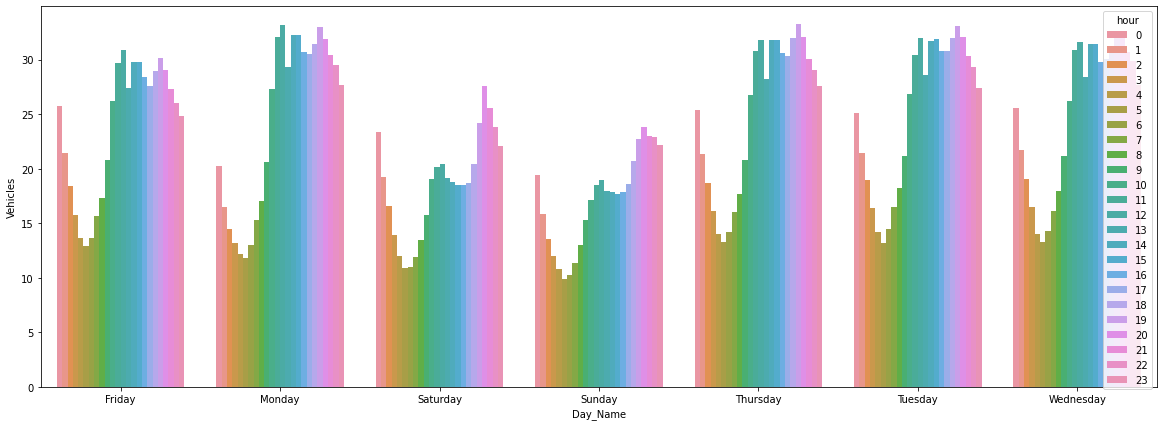

In [361]:
plt.figure(figsize=(20,7))
sns.barplot(x='Day_Name',y='Vehicles',hue='hour',data=l1)

In [367]:
num_cols=df_try11.select_dtypes(include=['int64','float64']).columns
num_col=list(num_cols)
num_cols

Index(['Vehicles', 'train/test', 'month', 'hour', 'weekend', 'AM_PM',
       'peak/non_peak', 'day_name_priority', 'junction_priority',
       'Junction_labelencoded'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

df_try20[['month', 'hour','peak/non_peak', 'day_name_priority', 'junction_priority','Junction_labelencoded']]=ss.fit_transform(df_try20[['month', 'hour','peak/non_peak', 'day_name_priority', 'junction_priority','Junction_labelencoded']])

In [380]:
train=df_try20[df_try20['train/test']==1]
test=df_try20[df_try20['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [381]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   3.532816113589211

**********************************rf**********************************
RMSE of model  :   1.4733200049799033

*******************************rf_boost*******************************
RMSE of model  :   14.438699569990904

********************************gboost********************************
RMSE of model  :   6.513883330512899

Learning rate set to 0.077778
0:	learn: 19.4356380	total: 18ms	remaining: 17.9s
1:	learn: 18.2126661	total: 27.4ms	remaining: 13.7s
2:	learn: 17.0978259	total: 36.9ms	remaining: 12.3s
3:	learn: 16.0660095	total: 46.9ms	remaining: 11.7s
4:	learn: 15.1289122	total: 56.8ms	remaining: 11.3s
5:	learn: 14.2915871	total: 65.7ms	remaining: 10.9s
6:	learn: 13.5195600	total: 75.6ms	remaining: 10.7s
7:	learn: 12.8283036	total: 84.6ms	remaining: 10.5s
8:	learn: 12.1902983	total: 93.5ms	remaining: 10.3s
9:	learn: 11.6244541	total: 103ms	remaining: 10.2s
10:	learn: 11.1

In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=knn.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/knn_basefe20.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_basefe20.csv')


id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=cbc.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/cbc_basefe20.csv')

#feature selection 

In [0]:
#df_try11

In [453]:
train=df_try11[df_try11['train/test']==1]
test=df_try11[df_try11['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [454]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
#models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.770639631513324

**********************************rf**********************************
RMSE of model  :   1.4823151382754047

*******************************rf_boost*******************************
RMSE of model  :   12.811705476934018

********************************gboost********************************
RMSE of model  :   6.5138833305129

  Description       rmse
1         knn   4.770640
2          rf   1.482315
3    rf_boost  12.811705
4      gboost   6.513883


In [455]:
imp=pd.DataFrame(rf.feature_importances_,index=x.columns,columns=['sign'])

sign_df=imp.sort_values(by="sign",ascending=False)
sign_df1=sign_df.reset_index()
sign_df1
#sign_df_final=sign_df1[sign_df1['sign']>0.002696]
#sign_df_final

,index,sign
0,Junction_labelencoded,0.267598
1,junction_priority,0.248819
2,year_2017,0.137545
3,peak/non_peak,0.131811
4,month,0.063839
5,day_name_priority,0.033530
6,weekend,0.028939
7,year_2016,0.026979
8,hour,0.016901
9,Day_Name_Monday,0.002397


In [499]:
sign_df_final=sign_df1[sign_df1['sign']>=0.001000]
sign_df_final

,index,sign
0,Junction_labelencoded,0.267598
1,junction_priority,0.248819
2,year_2017,0.137545
3,peak/non_peak,0.131811
4,month,0.063839
5,day_name_priority,0.033530
6,weekend,0.028939
7,year_2016,0.026979
8,hour,0.016901
9,Day_Name_Monday,0.002397


In [500]:
list_cols=list(sign_df_final['index'])
list_cols.append('train/test')
list_cols.append('Vehicles')
print(len(list_cols))

31


In [501]:
df_try21=df_try11[list_cols]
print(df_try21.shape)

(59928, 31)


In [502]:
train=df_try21[df_try21['train/test']==1]
test=df_try21[df_try21['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test"])
x_test=test.drop(columns=["train/test",'Vehicles'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 29)
y_train shape is  (48120,)
x_test shape is  (11808, 29)


In [503]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
#models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.88023223491123

**********************************rf**********************************
RMSE of model  :   2.4528564612740444

*******************************rf_boost*******************************
RMSE of model  :   12.558175151225681

********************************gboost********************************
RMSE of model  :   6.471129976665805

  Description       rmse
1         knn   4.880232
2          rf   2.452856
3    rf_boost  12.558175
4      gboost   6.471130


In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_fs8.csv')



#hyperparameter tuning of random forrest regressor

In [505]:
train=df_try11[df_try11['train/test']==1]
test=df_try11[df_try11['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test","DateTime"])
x_test=test.drop(columns=["train/test",'Vehicles',"DateTime"])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 46)
y_train shape is  (48120,)
x_test shape is  (11808, 46)


In [0]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [0]:
params={'n_estimators':np.arange(1,100),'criterion':['mse']}

In [509]:
from sklearn.model_selection import GridSearchCV
gs_rf=GridSearchCV(rf,param_grid=params,scoring='neg_mean_squared_error',cv=5)
gs_rf.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, rand...
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44,

In [513]:
gs_rf.best_params_

{'criterion': 'mse', 'n_estimators': 5}

In [0]:
rf=RandomForestRegressor(**gs_rf.best_params_)

In [516]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor(**gs_rf.best_params_)
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
#cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
#models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   4.770639631513324

**********************************rf**********************************
RMSE of model  :   1.9858910071475036

*******************************rf_boost*******************************
RMSE of model  :   11.977307097990568

********************************gboost********************************
RMSE of model  :   6.513883330512901

  Description       rmse
1         knn   4.770640
2          rf   1.985891
3    rf_boost  11.977307
4      gboost   6.513883


In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_h.csv')



#feature selection

In [518]:
imp=pd.DataFrame(rf.feature_importances_,index=x.columns,columns=['sign'])

sign_df=imp.sort_values(by="sign",ascending=False)
sign_df1=sign_df.reset_index()
sign_df1

,index,sign
0,junction_priority,0.305888
1,Junction_labelencoded,0.208860
2,year_2017,0.139070
3,peak/non_peak,0.131948
4,month,0.062974
5,weekend,0.035209
6,day_name_priority,0.027175
7,year_2016,0.026816
8,hour,0.017492
9,Day_23,0.002262


In [543]:
sign_df_final=sign_df1[sign_df1['sign']>0.001458]
sign_df_final

,index,sign
0,junction_priority,0.305888
1,Junction_labelencoded,0.208860
2,year_2017,0.139070
3,peak/non_peak,0.131948
4,month,0.062974
5,weekend,0.035209
6,day_name_priority,0.027175
7,year_2016,0.026816
8,hour,0.017492
9,Day_23,0.002262


In [544]:
list_cols=list(sign_df_final['index'])
list_cols.append('train/test')
list_cols.append('Vehicles')
print(len(list_cols))

20


In [545]:
df_try22=df_try11[list_cols]
print(df_try22.shape)

(59928, 20)


In [546]:
train=df_try22[df_try22['train/test']==1]
test=df_try22[df_try22['train/test']==0]
y=train['Vehicles']
x=train.drop(columns=['Vehicles',"train/test"])
x_test=test.drop(columns=["train/test",'Vehicles'])

print("x_train shape is ",x.shape)
print("y_train shape is ",y.shape)
print("x_test shape is ",x_test.shape)

x_train shape is  (48120, 18)
y_train shape is  (48120,)
x_test shape is  (11808, 18)


In [547]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
#from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor



results=[]
names=[]

#lr=LinearRegression()
knn=KNeighborsRegressor()
#svm=SVC(probability=True)
rf=RandomForestRegressor()
#nb=GaussianNB()
rf_boost=AdaBoostRegressor()
gboost=GradientBoostingRegressor()
cbc=CatBoostRegressor()

models=[]

models.append(('knn',knn))
models.append(('rf',rf))
models.append(('rf_boost',rf_boost))
models.append(('gboost',gboost))
#models.append(('cbc',cbc))

count=0
output_result=pd.DataFrame(columns=['Description','rmse'])

import warnings
for name,algo in models:
    count=count+1
    model=algo.fit(x,y)
    y_pred_train=model.predict(x)
    from sklearn import metrics
    rmse=np.sqrt(metrics.mean_squared_error(y,y_pred_train)) 


    print(name.center(70,'*'))
    print('RMSE of model  :  ', rmse)
    print()
  
    output_result=pd.concat([output_result,pd.DataFrame({"Description":name,'rmse':rmse },index=[count])],axis=0)
    
print(output_result)

*********************************knn**********************************
RMSE of model  :   5.042419889050257

**********************************rf**********************************
RMSE of model  :   3.9206214115901914

*******************************rf_boost*******************************
RMSE of model  :   12.636866202409847

********************************gboost********************************
RMSE of model  :   6.494308203489216

  Description       rmse
1         knn   5.042420
2          rf   3.920621
3    rf_boost  12.636866
4      gboost   6.494308


In [0]:
id=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IOT/test_BdBKkAj_L87Nc3S.csv")
y_pred=rf.predict(x_test)
r1=id['ID']
r2=pd.DataFrame(y_pred,columns=['Vehicles'])
result=pd.concat([r1,r2],axis=1)
result.head()
result.to_csv('/content/drive/My Drive/Colab Notebooks/IOT/results/rf_hfs5.csv')
